In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("/use_all_btu.csv")
codes = pd.read_csv("/Codes_and_Descriptions.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

  Data_Status State    MSN    1960    1961    1962    1963    1964    1965  \
0       2023F    AK  ABICB     0.0     0.0     0.0     0.0     0.0     0.0   
1       2023F    AK  ARICB   312.0   555.0   489.0   589.0   791.0   878.0   
2       2023F    AK  ARTCB   312.0   555.0   489.0   589.0   791.0   878.0   
3       2023F    AK  ARTXB   312.0   555.0   489.0   589.0   791.0   878.0   
4       2023F    AK  AVACB  5209.0  6441.0  5202.0  3273.0  2319.0  1478.0   

     1966  ...     2014     2015     2016     2017    2018     2019     2020  \
0     0.0  ...     -2.0     -3.0     -3.0     -2.0   -14.0    -10.0     -7.0   
1  1646.0  ...  12335.0  12450.0  12365.0  13561.0  4804.0  11973.0  12391.0   
2  1646.0  ...  12335.0  12450.0  12365.0  13561.0  4804.0  11973.0  12391.0   
3  1646.0  ...  12335.0  12450.0  12365.0  13561.0  4804.0  11973.0  12391.0   
4  1086.0  ...    658.0   1308.0   1240.0   1239.0  1264.0   1245.0    915.0   

      2021     2022     2023  
0     -8.0     -6.0

In [ ]:
# Clean the codes file
codes_clean = codes[['Unnamed: 2', 'Unnamed: 3']].rename(
    columns={'Unnamed: 2': 'MSN', 'Unnamed: 3' : 'Description' }
).dropna()

# Merge
df = pd.merge(df, codes_clean, on="MSN", how="left")

In [ ]:
# Check missing values
print(df.isnull().sum().sort_values(ascending=False))

Description_y    16648
Description_x    16648
1962              5201
1960              5201
1961              5201
                 ...  
2021                52
2022                52
State                0
Data_Status          0
MSN                  0
Length: 69, dtype: int64


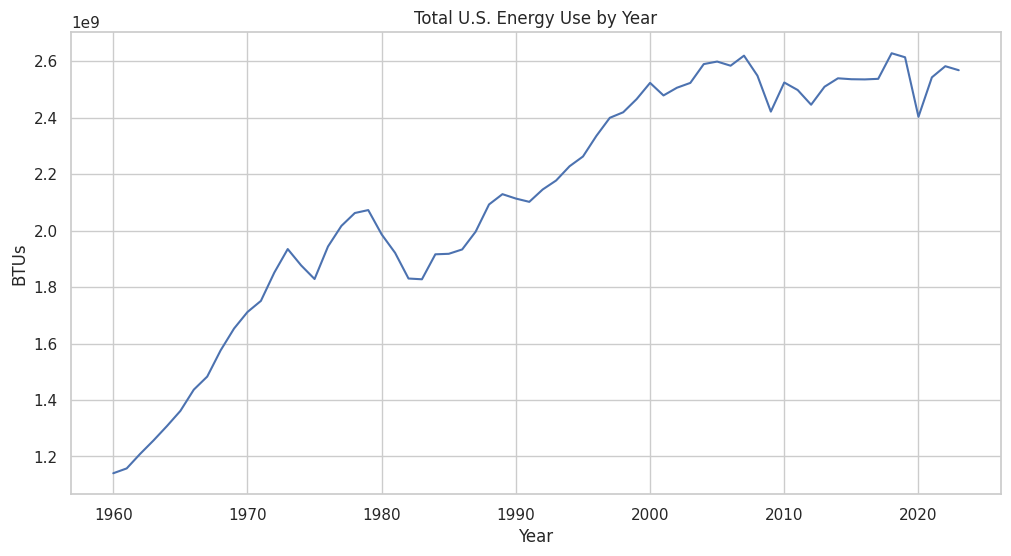

In [ ]:
# Total energy use over time
year_cols = [col for col in df.columns if col.isdigit()]
total_by_year = df[year_cols].sum()

plt.figure(figsize=(12, 6))
total_by_year.plot(title="Total U.S. Energy Use by Year", xlabel="Year", ylabel="BTUs")
plt.grid(True)
plt.show()

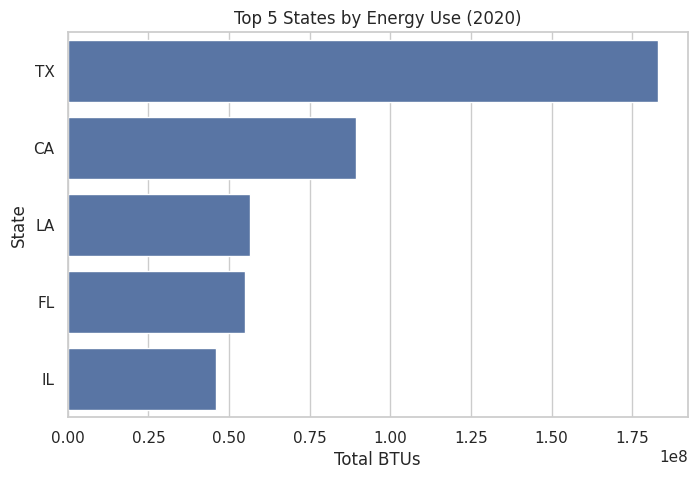

In [ ]:
#Top 5 states in 2020

filtered_df = df[df['State'] != 'US']

top_states_2020 = filtered_df.groupby("State")["2020"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_states_2020.values, y=top_states_2020.index)
plt.title("Top 5 States by Energy Use (2020)")
plt.xlabel("Total BTUs")
plt.show()

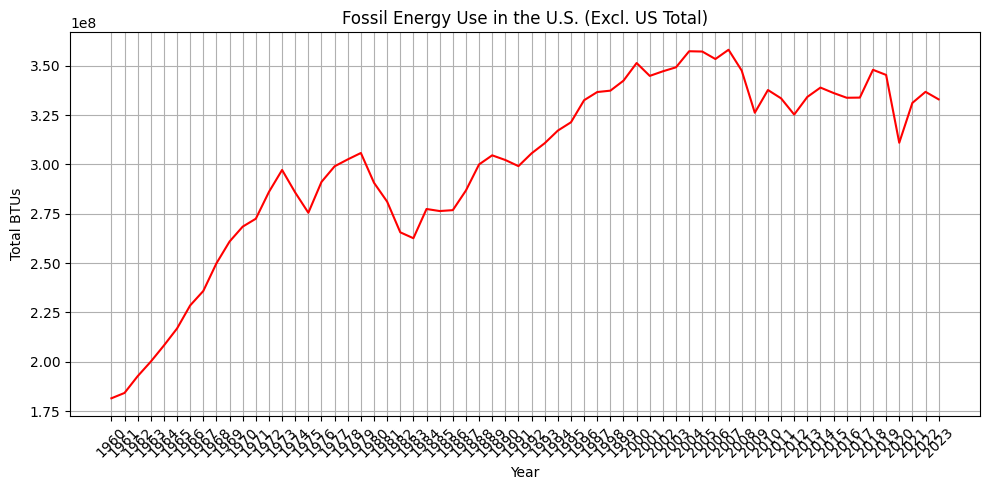

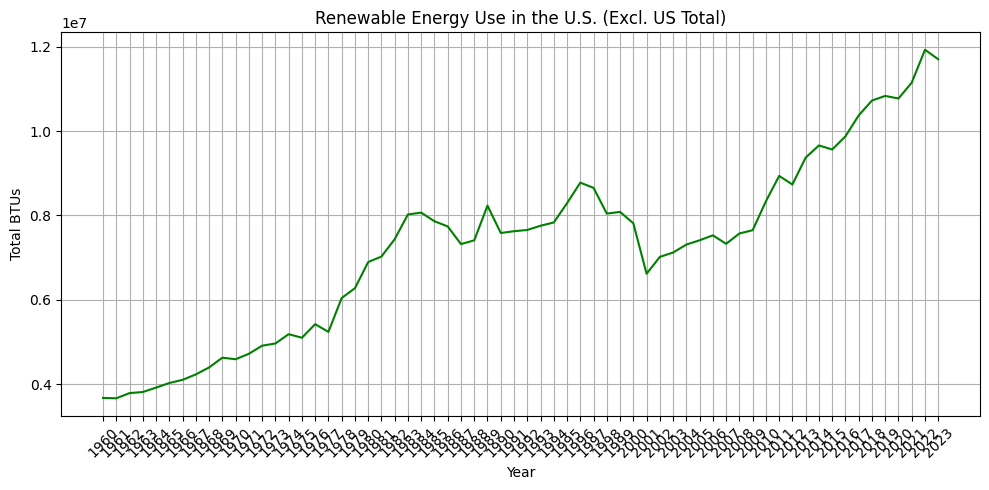

In [ ]:
#Fossil Fuel Energy Use in US and Renewable Energy Use in US
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSVs
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean and extract MSN descriptions
description_rows = codes_df[codes_df['Unnamed: 2'].notnull() & codes_df['Unnamed: 3'].notnull()]
description_rows = description_rows.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
description_rows = description_rows[['MSN', 'Description']].dropna()

# Merge data
merged_df = pd.merge(use_all_btu_df, description_rows, on="MSN", how="left")

# Categorize MSN using 2-letter prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Filter for relevant rows
merged_df = merged_df[merged_df["State"] != "US"]
year_cols = [col for col in merged_df.columns if col.isdigit()]
filtered_df = merged_df[merged_df["Energy_Type"].isin(["Fossil", "Renewable"])]

# Group and transpose
energy_trends = filtered_df.groupby("Energy_Type")[year_cols].sum().T

# === Plot Fossil ===
plt.figure(figsize=(10, 5))
plt.plot(energy_trends.index, energy_trends["Fossil"], label="Fossil", color='red')
plt.title("Fossil Energy Use in the U.S. (Excl. US Total)")
plt.xlabel("Year")
plt.ylabel("Total BTUs")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Plot Renewable ===
plt.figure(figsize=(10, 5))
plt.plot(energy_trends.index, energy_trends["Renewable"], label="Renewable", color='green')
plt.title("Renewable Energy Use in the U.S. (Excl. US Total)")
plt.xlabel("Year")
plt.ylabel("Total BTUs")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


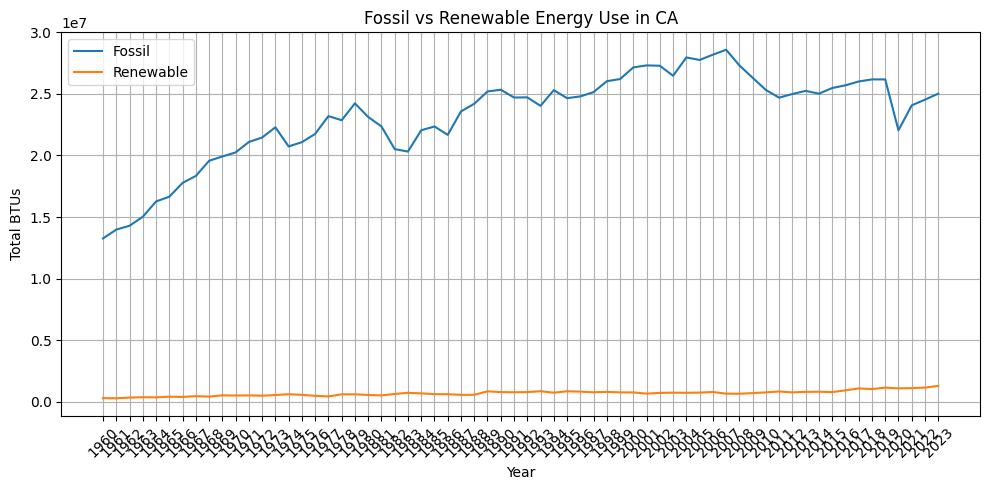

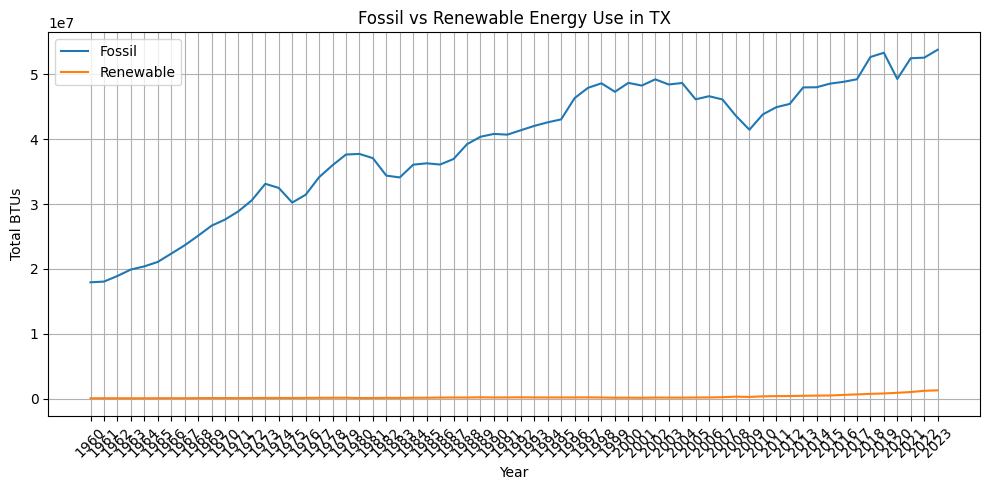

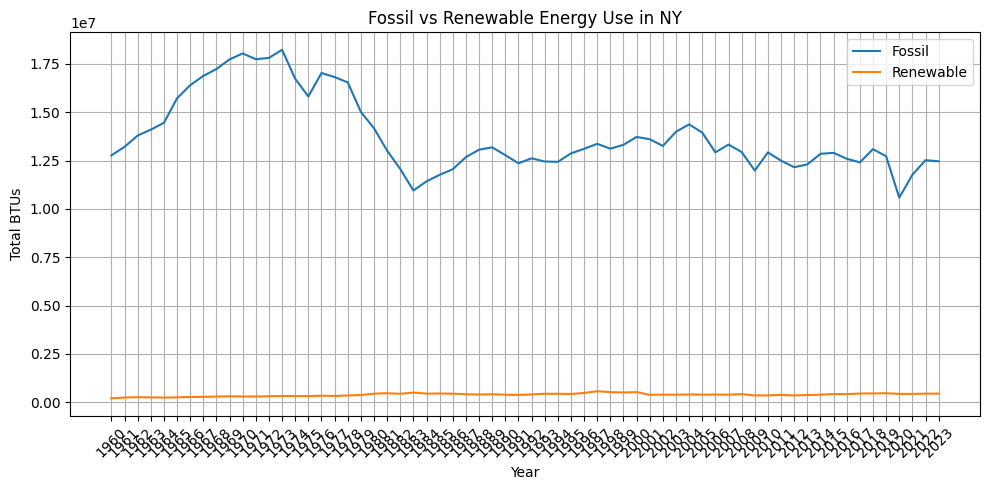

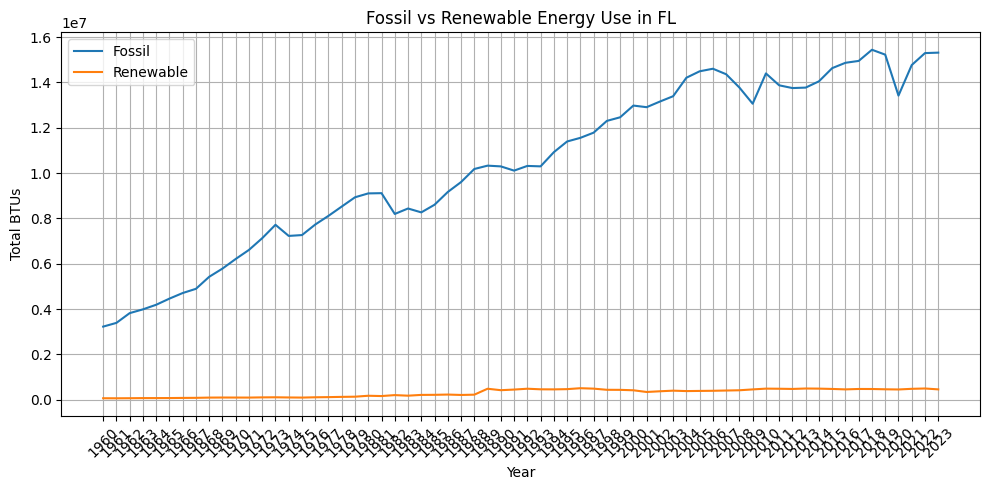

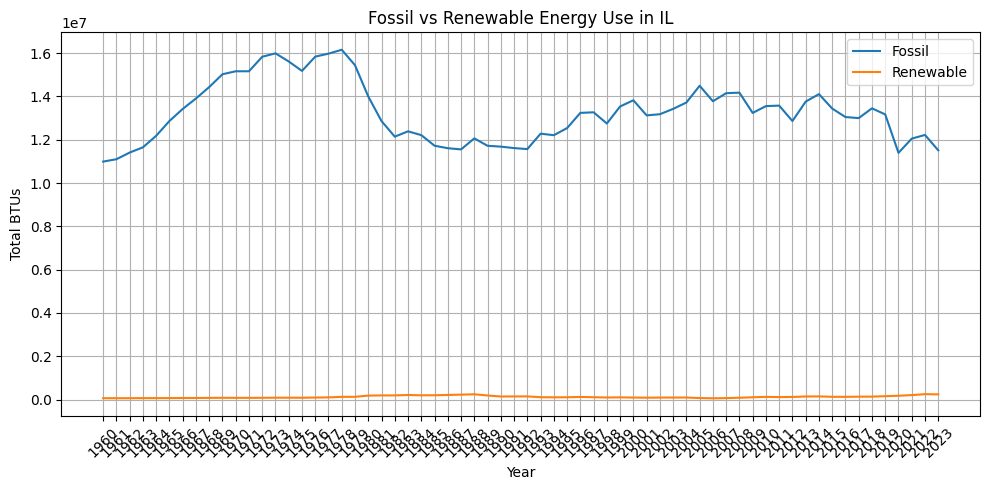

In [ ]:
# Group by Energy Type and State
grouped_by_state = filtered_df.groupby(['Energy_Type', 'State'])[year_cols].sum()

# Pick a few example states (or all, but it's a lot)
states_to_plot = ['CA', 'TX', 'NY', 'FL', 'IL']

for state in states_to_plot:
    plt.figure(figsize=(10, 5))
    for energy_type in ['Fossil', 'Renewable']:
        data = grouped_by_state.loc[(energy_type, state)]
        plt.plot(year_cols, data, label=energy_type)

    plt.title(f"Fossil vs Renewable Energy Use in {state}")
    plt.xlabel("Year")
    plt.ylabel("Total BTUs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


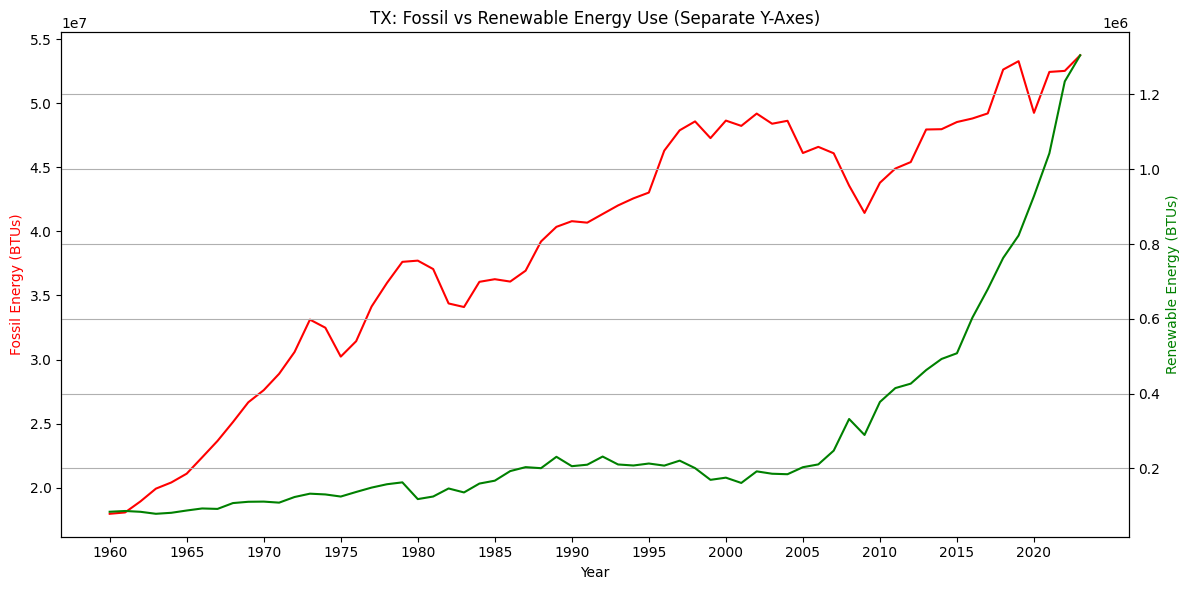

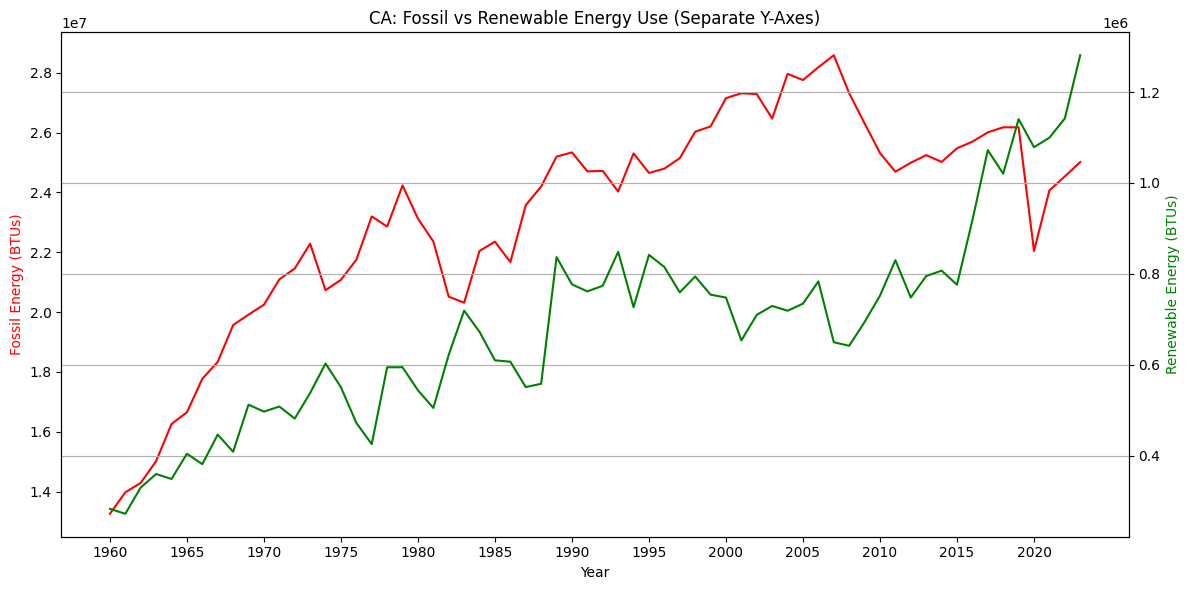

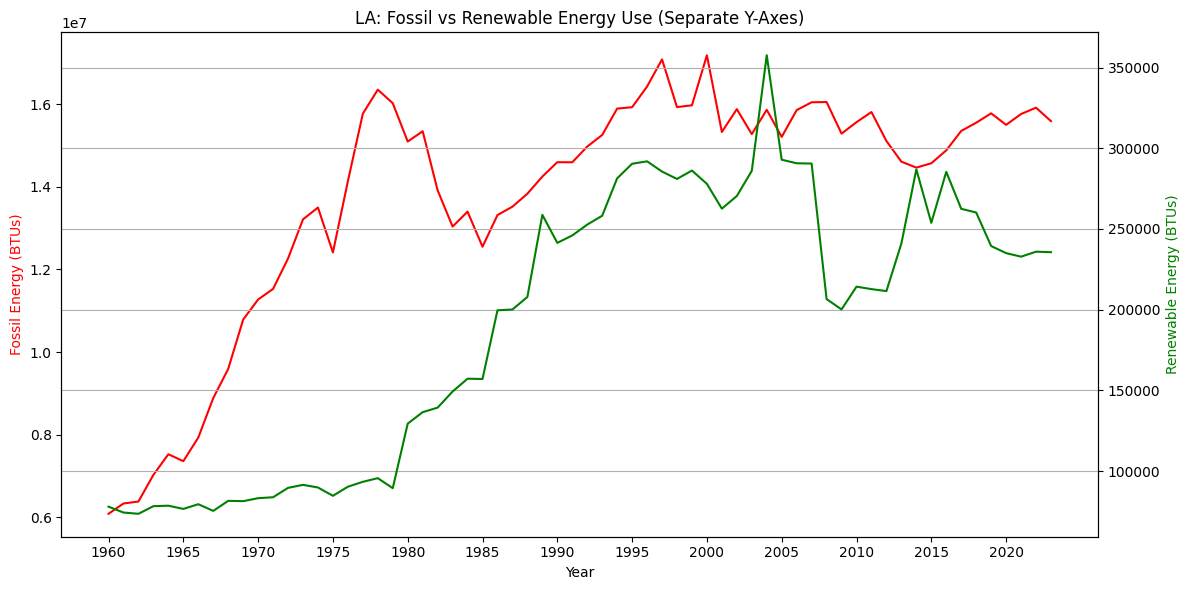

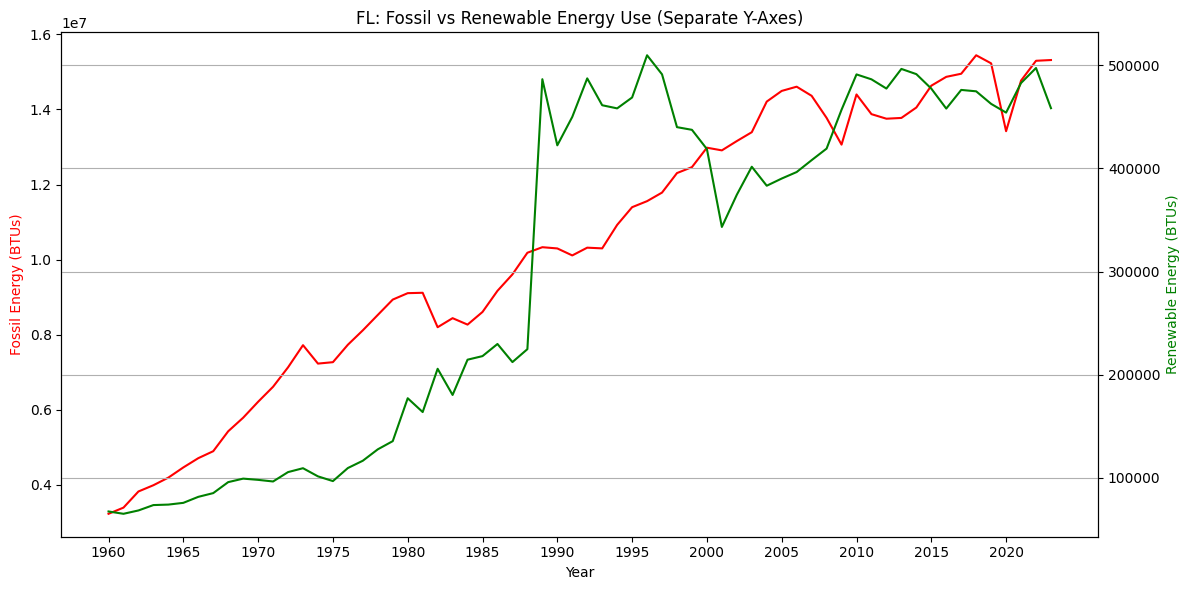

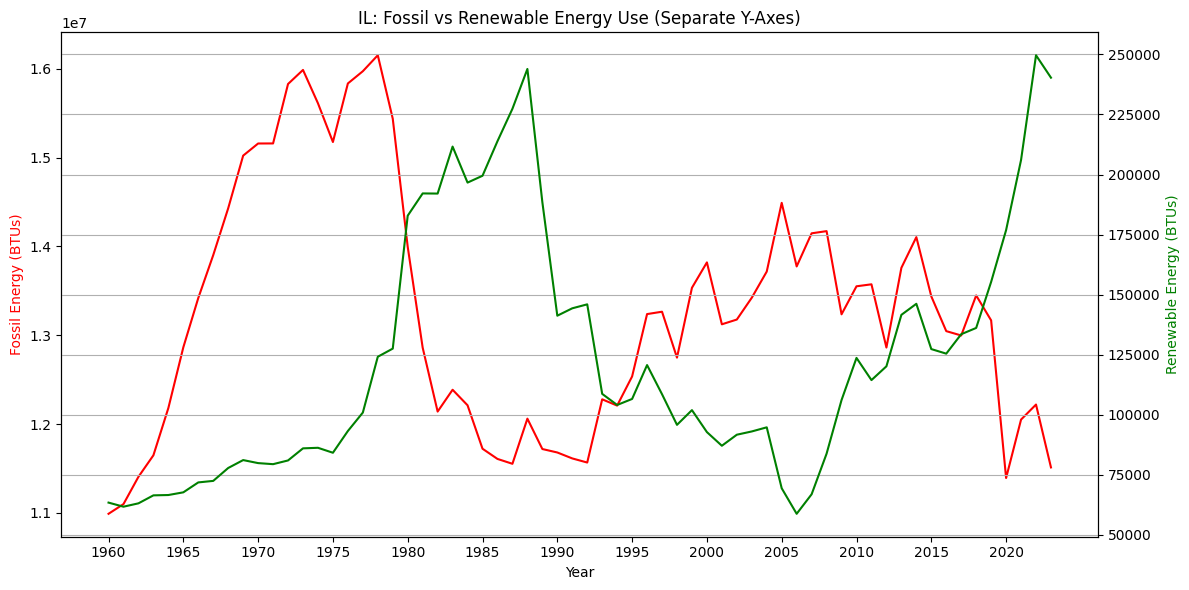

In [ ]:
#Fossil Fuel vs Renewable Energy by State
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSVs
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean MSN descriptions
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()

# Merge
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Classify Energy Type from MSN prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Filter and group
merged_df = merged_df[merged_df["State"] != "US"]
year_cols = [col for col in merged_df.columns if col.isdigit()]
filtered_df = merged_df[merged_df["Energy_Type"].isin(["Fossil", "Renewable"])]
grouped_by_state = filtered_df.groupby(["Energy_Type", "State"])[year_cols].sum()

# States to plot
states = ["TX", "CA", "LA", "FL", "IL"]

# Plot for each state
for state in states:
    if ('Fossil', state) in grouped_by_state.index and ('Renewable', state) in grouped_by_state.index:
        fossil_data = grouped_by_state.loc[('Fossil', state)]
        renewable_data = grouped_by_state.loc[('Renewable', state)]

        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax2 = ax1.twinx()

        ax1.plot(year_cols, fossil_data.values, 'r-', label="Fossil")
        ax2.plot(year_cols, renewable_data.values, 'g-', label="Renewable")

        ax1.set_xlabel("Year")
        ax1.set_ylabel("Fossil Energy (BTUs)", color='r')
        ax2.set_ylabel("Renewable Energy (BTUs)", color='g')
        plt.title(f"{state}: Fossil vs Renewable Energy Use (Separate Y-Axes)")
        plt.grid(True)

        # Clean x-axis: show every 5th year
        year_indices = np.arange(len(year_cols))
        tick_indices = year_indices[::5]
        tick_labels = [year_cols[i] for i in tick_indices]
        plt.xticks(tick_indices, tick_labels, rotation=45)

        plt.tight_layout()
        plt.show()


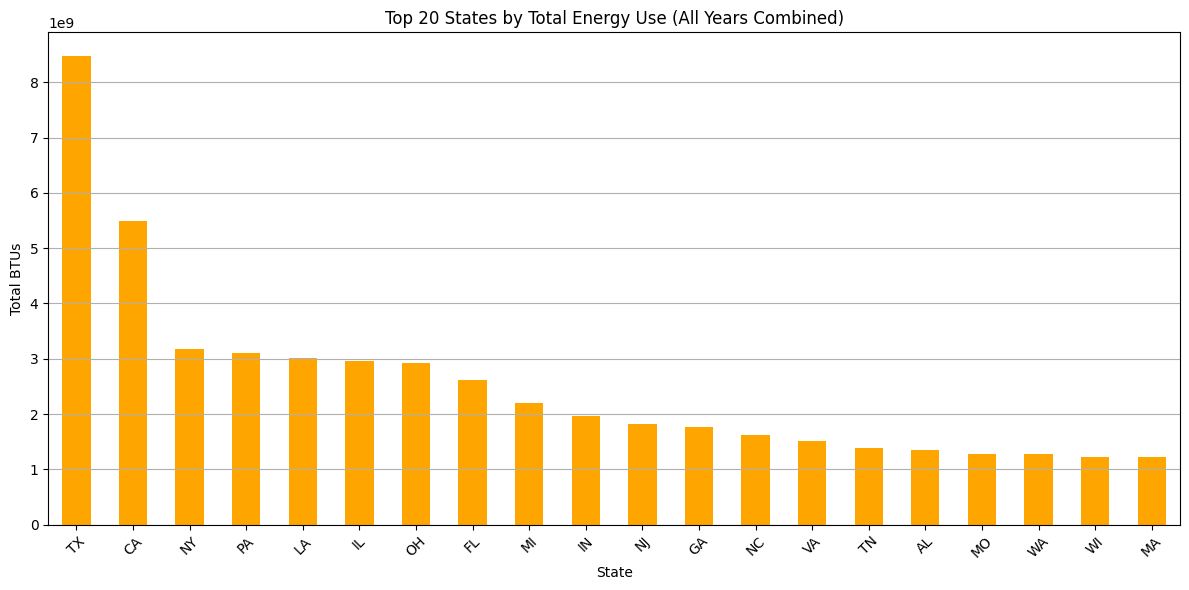

In [ ]:
# Top 20 States by Total Energy Use (All Years Combined)
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files (adjust path if necessary)
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean codes table
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()

# Merge with energy data
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Remove national-level aggregate
merged_df = merged_df[merged_df["State"] != "US"]

# Identify year columns (e.g., '1960', ..., '2023')
year_cols = [col for col in merged_df.columns if col.isdigit()]

# Calculate total energy use by state across all MSN categories and all years
state_total_energy = merged_df.groupby("State")[year_cols].sum()

# Sum across years for each state
state_total_energy["Total"] = state_total_energy.sum(axis=1)

# Sort by total and select top 20
top_states = state_total_energy["Total"].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
top_states.head(20).plot(kind='bar', color='orange')
plt.title("Top 20 States by Total Energy Use (All Years Combined)")
plt.ylabel("Total BTUs")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


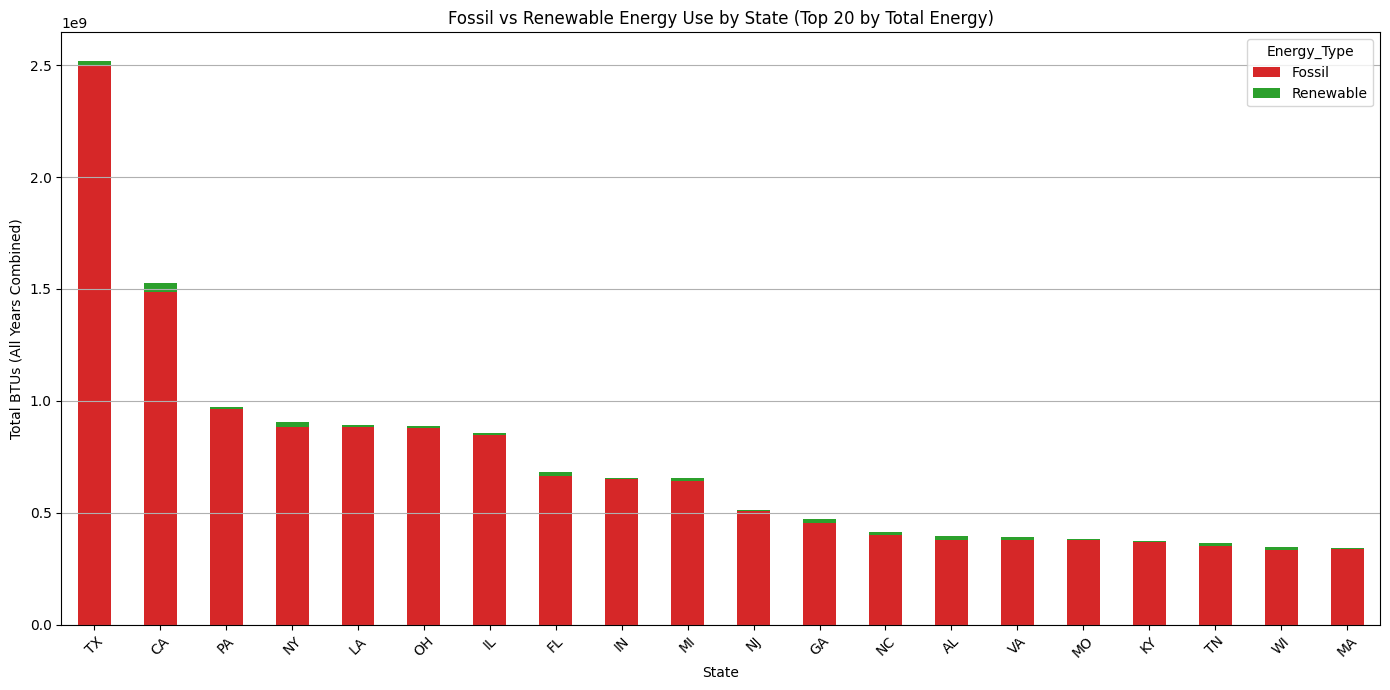

In [ ]:
# Fossil vs Renewable by State (Stacked Bar)
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSVs
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean and extract descriptions
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()

# Merge with energy data
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Categorize energy type using MSN prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Filter out national data and include only Fossil & Renewable
merged_df = merged_df[(merged_df["State"] != "US") & merged_df["Energy_Type"].isin(["Fossil", "Renewable"])]

# Identify year columns
year_cols = [col for col in merged_df.columns if col.isdigit()]

# Group by State and Energy_Type, then sum across years
grouped = merged_df.groupby(["State", "Energy_Type"])[year_cols].sum()
grouped["Total"] = grouped.sum(axis=1)

# Reshape so we get Fossil and Renewable columns per state
state_energy_totals = grouped["Total"].unstack().fillna(0)

# Add a 'Total' column for sorting and filter top 20
state_energy_totals["Total"] = state_energy_totals["Fossil"] + state_energy_totals["Renewable"]
top_20_states = state_energy_totals.sort_values("Total", ascending=False).head(20)

# Plot the stacked bar chart
top_20_states[["Fossil", "Renewable"]].plot(
    kind="bar", stacked=True, figsize=(14, 7), color=["#d62728", "#2ca02c"]
)
plt.title("Fossil vs Renewable Energy Use by State (Top 20 by Total Energy)")
plt.xlabel("State")
plt.ylabel("Total BTUs (All Years Combined)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


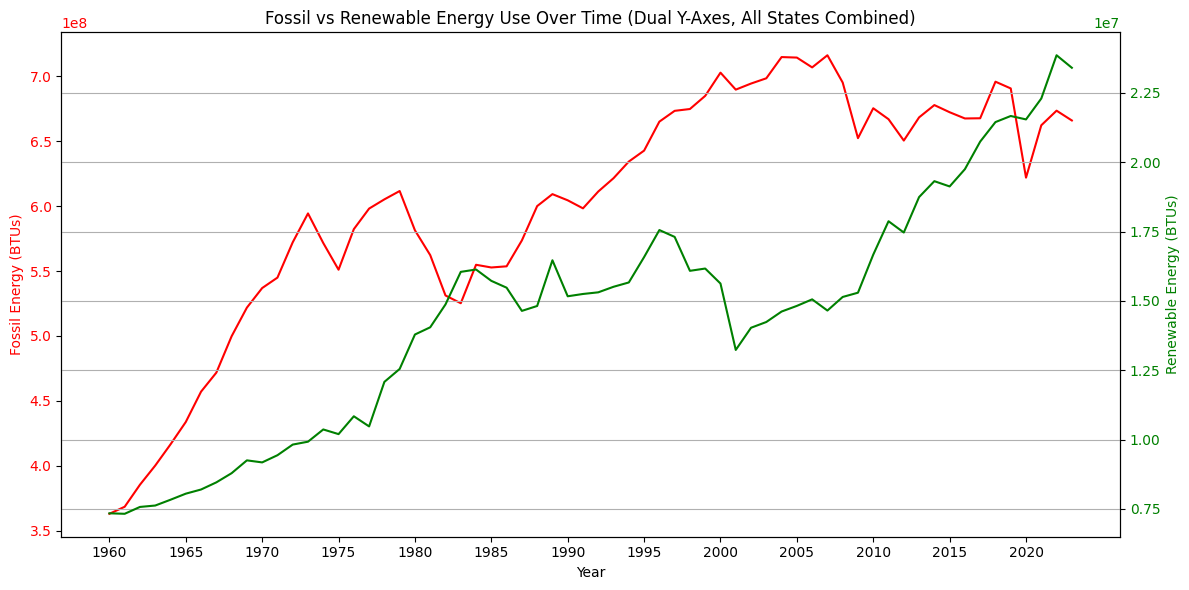

In [ ]:
# Dual Y-Axis - Fossil vs Renewable (National)
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean codes data
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()

# Merge datasets
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Classify energy type using MSN prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Filter to Fossil and Renewable
merged_df = merged_df[merged_df["Energy_Type"].isin(["Fossil", "Renewable"])]

# Identify year columns
year_cols = [col for col in merged_df.columns if col.isdigit()]

# Group by energy type and sum across all states
national_trend = merged_df.groupby("Energy_Type")[year_cols].sum().T

# Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fossil on left Y-axis
ax1.plot(national_trend.index, national_trend["Fossil"], 'r-', label='Fossil')
ax1.set_ylabel("Fossil Energy (BTUs)", color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Plot Renewable on right Y-axis
ax2 = ax1.twinx()
ax2.plot(national_trend.index, national_trend["Renewable"], 'g-', label='Renewable')
ax2.set_ylabel("Renewable Energy (BTUs)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Final formatting
ax1.set_xlabel("Year")
plt.title("Fossil vs Renewable Energy Use Over Time (Dual Y-Axes, All States Combined)")
# Show every 5th year and rotate
tick_years = national_trend.index[::5]  # every 5th year
plt.xticks(ticks=tick_years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


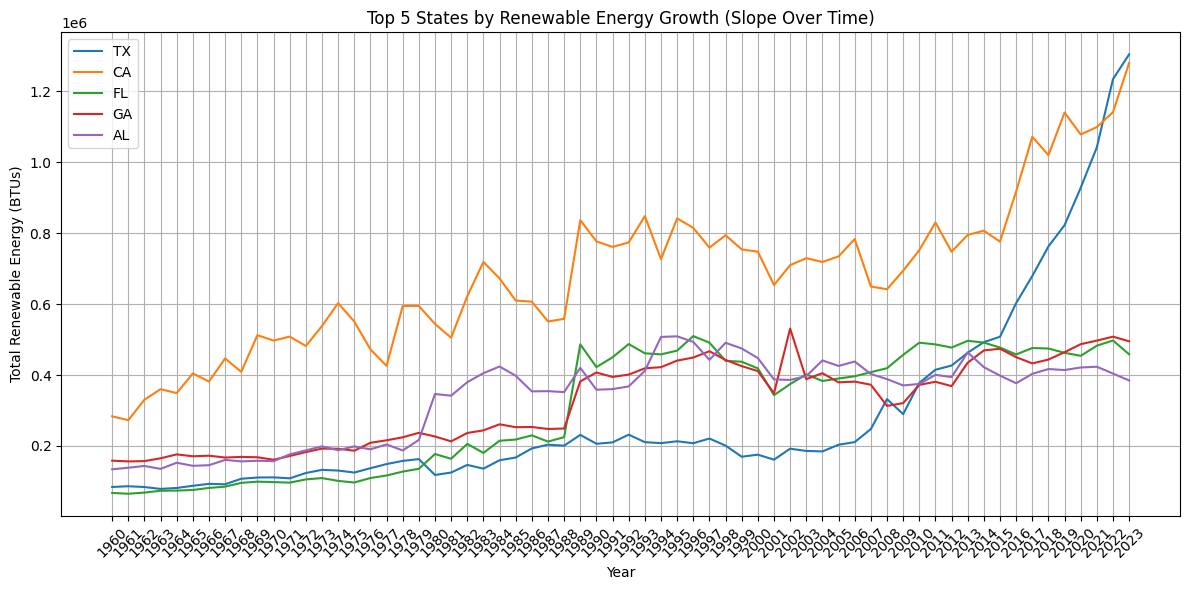

In [ ]:
# Top 5 Renewable Energy Growth States
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean and merge descriptions
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Define energy type from MSN prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Filter only renewable energy and non-US states
renewable_df = merged_df[(merged_df["Energy_Type"] == "Renewable") & (merged_df["State"] != "US")]

# Get year columns
year_cols = [col for col in renewable_df.columns if col.isdigit()]
years = np.array([int(y) for y in year_cols])

# Group by state and sum yearly values
renewable_by_state = renewable_df.groupby("State")[year_cols].sum()

# Calculate slope of linear trend per state
slopes = {}
for state, row in renewable_by_state.iterrows():
    values = row.values
    if np.any(values):  # skip states with all zeros
        m, _ = np.polyfit(years, values, 1)
        slopes[state] = m

# Get top 5 states by slope
top5_states = sorted(slopes.items(), key=lambda x: x[1], reverse=True)[:5]
top5_state_names = [s[0] for s in top5_states]

# Plot renewable energy trends for top 5 states
plt.figure(figsize=(12, 6))
for state in top5_state_names:
    plt.plot(year_cols, renewable_by_state.loc[state], label=state)

plt.title("Top 5 States by Renewable Energy Growth (Slope Over Time)")
plt.xlabel("Year")
plt.ylabel("Total Renewable Energy (BTUs)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


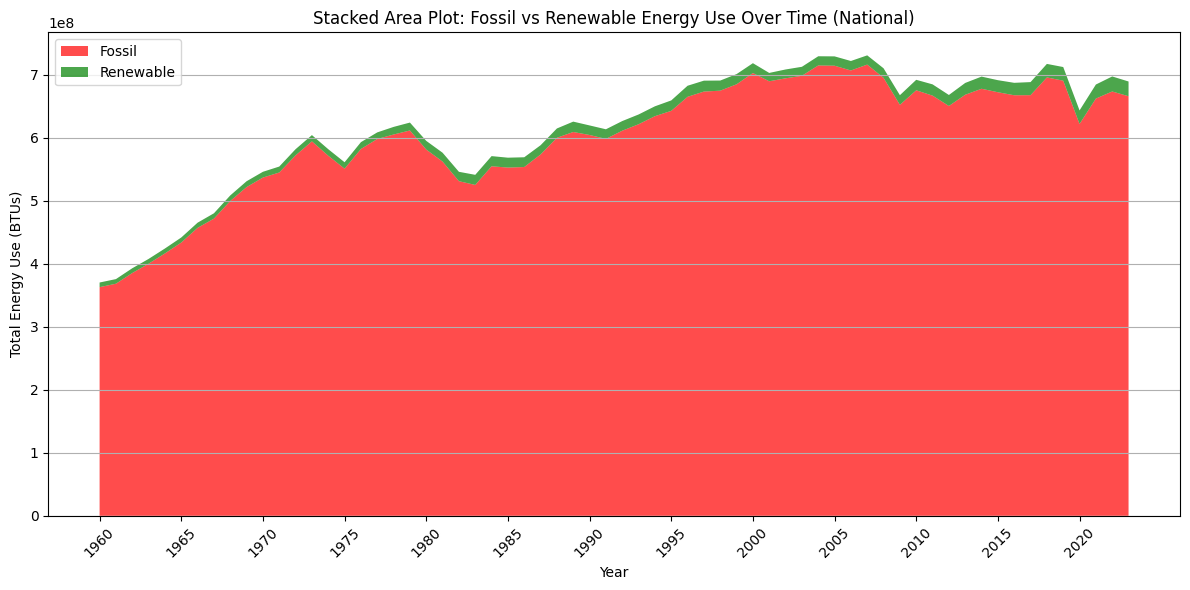

In [ ]:
# Stacked Area Plot (Fossil vs Renewable)
import pandas as pd
import matplotlib.pyplot as plt

# Load data
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean and merge
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Categorize by MSN prefix
def categorize_by_msn_prefix(msn):
    prefix = msn[:2].upper()
    fossil_prefixes = {"NG", "CL", "CO", "PA", "PC", "DF", "JF", "FF"}
    renewable_prefixes = {"HY", "WD", "WS", "SO", "GE", "WY"}
    if prefix in fossil_prefixes:
        return "Fossil"
    elif prefix in renewable_prefixes:
        return "Renewable"
    else:
        return "Other"

merged_df["Energy_Type"] = merged_df["MSN"].apply(categorize_by_msn_prefix)

# Keep only fossil and renewable
year_cols = [col for col in merged_df.columns if col.isdigit()]
national_df = merged_df[merged_df["Energy_Type"].isin(["Fossil", "Renewable"])]

# Aggregate total BTUs per year, per energy type
national_trend = national_df.groupby("Energy_Type")[year_cols].sum().T
national_trend.index = national_trend.index.astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(
    national_trend.index,
    national_trend["Fossil"],
    national_trend["Renewable"],
    labels=["Fossil", "Renewable"],
    colors=["red", "green"],
    alpha=0.7
)

plt.title("Stacked Area Plot: Fossil vs Renewable Energy Use Over Time (National)")
plt.xlabel("Year")
plt.ylabel("Total Energy Use (BTUs)")
plt.xticks(ticks=national_trend.index[::5], rotation=45)
plt.legend(loc="upper left")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-4093941225.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df[year_cols] = state_df[year_cols].apply(pd.to_numeric, errors="coerce")
/tmp/ipython-input-11-4093941225.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)
/tmp/ipython-input-11-4093941225.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df[year_cols] = state_df[year_cols].applymap(l

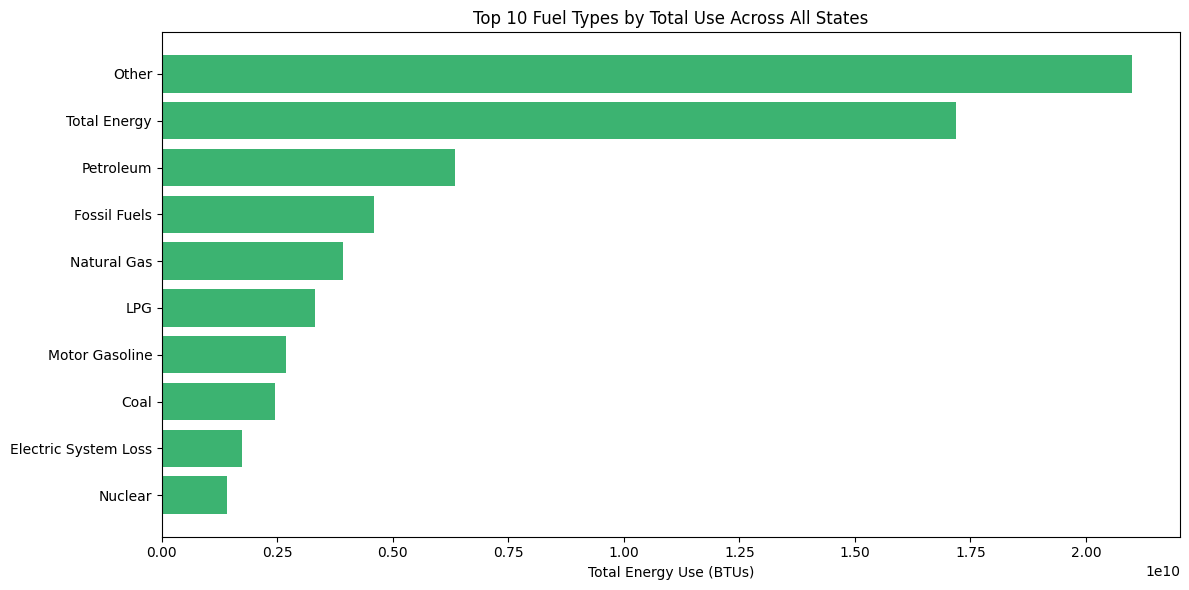

In [ ]:
# Top 10 Fuel Types by Total Energy Use
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
use_all_btu_df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Identify and clean MSN → Description
codes_df = codes_df.rename(columns={
    'Unnamed: 2': 'MSN',
    'Unnamed: 3': 'Description'
})
codes_clean = codes_df[['MSN', 'Description']].dropna()
use_all_btu_df.columns = [col.strip() for col in use_all_btu_df.columns]

# Merge Description (optional - not used in this logic)
merged_df = pd.merge(use_all_btu_df, codes_clean, on="MSN", how="left")

# Filter out national totals
state_df = merged_df[merged_df["State"] != "US"]

# Identify year columns
year_cols = [col for col in state_df.columns if col.isdigit()]

# Convert year data to numeric and replace negatives with NaN
state_df[year_cols] = state_df[year_cols].apply(pd.to_numeric, errors="coerce")
state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)

# Define prefix to fuel type mapping
msn_prefix_mapping = {
    "AB": "Biomass", "AR": "Biomass", "AV": "Aviation Gasoline",
    "CL": "Coal", "CO": "Coal", "DF": "Distillate Fuel Oil", "DL": "Diesel",
    "EL": "Electricity", "EN": "End Use", "ES": "Electric System Loss",
    "FF": "Fossil Fuels", "GE": "Geothermal", "GO": "Gasoline",
    "HH": "Heat and Power", "HY": "Hydroelectric", "JF": "Jet Fuel",
    "KA": "Kerosene", "LO": "LPG", "LU": "Lubricants", "MG": "Motor Gasoline",
    "ML": "Miscellaneous", "NN": "Nuclear", "NG": "Natural Gas",
    "PA": "Petroleum", "PC": "Petrochemical Feedstocks",
    "RE": "Renewables", "SO": "Solar", "TE": "Total Energy",
    "WD": "Wood", "WN": "Wind", "WS": "Waste", "WY": "Wood/Wind"
}

# Assign each MSN to a fuel type category
def map_fuel_type(msn):
    prefix = msn[:2].upper()
    return msn_prefix_mapping.get(prefix, "Other")

state_df["Fuel_Type"] = state_df["MSN"].apply(map_fuel_type)

# Group by fuel type and sum across years
fuel_type_totals = state_df.groupby("Fuel_Type")[year_cols].sum()
fuel_type_totals["Total_Use"] = fuel_type_totals.sum(axis=1)

# Get top 10 fuel types by total use
top_fuel_types = fuel_type_totals.sort_values("Total_Use", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_fuel_types.index, top_fuel_types["Total_Use"], color="mediumseagreen")
plt.xlabel("Total Energy Use (BTUs)")
plt.title("Top 10 Fuel Types by Total Use Across All States")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1322611280.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)


<Figure size 1400x700 with 0 Axes>

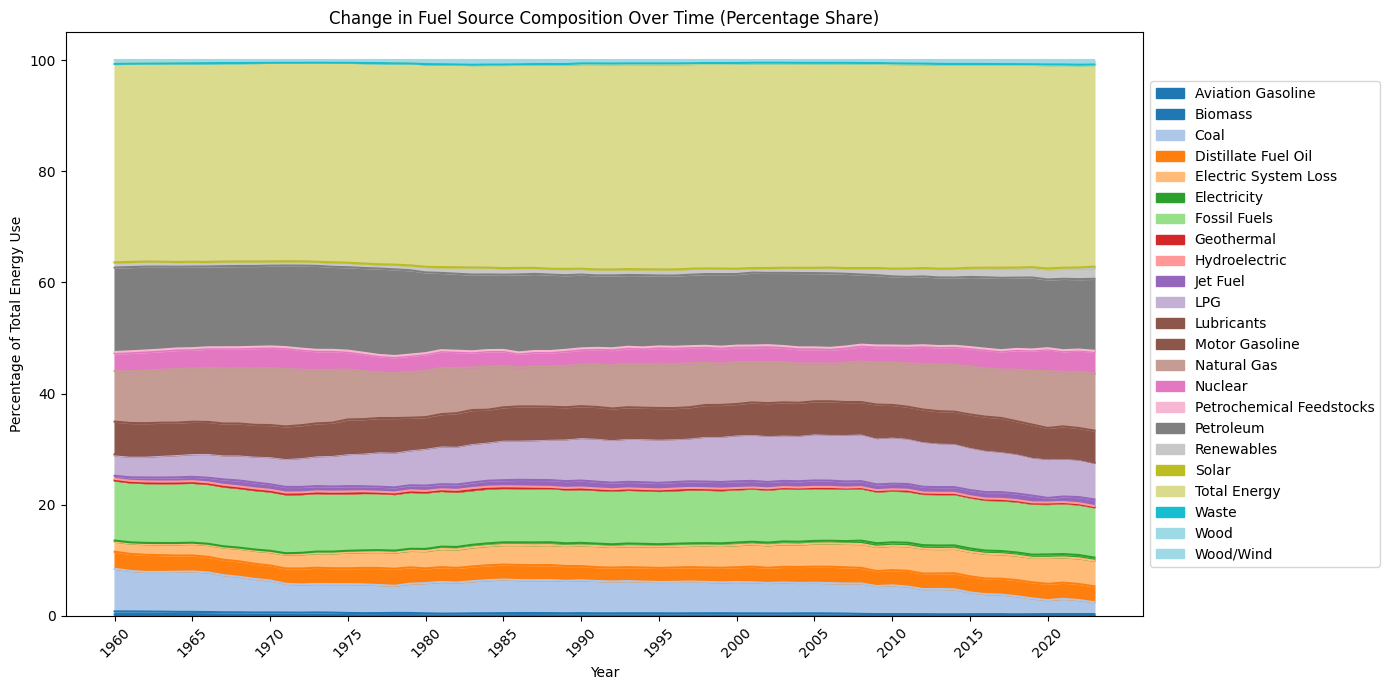

In [ ]:
# Change in Source Composition Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
use_all_btu_df = pd.read_csv("/use_all_btu.csv")

# Remove national total
state_df = use_all_btu_df[use_all_btu_df["State"] != "US"].copy()

# Identify year columns
year_cols = [col for col in state_df.columns if col.strip().isdigit()]
state_df[year_cols] = state_df[year_cols].apply(pd.to_numeric, errors="coerce")
state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)

# Define MSN prefix to fuel type mapping
msn_prefix_mapping = {
    "AB": "Biomass", "AR": "Biomass", "AV": "Aviation Gasoline",
    "CL": "Coal", "CO": "Coal", "DF": "Distillate Fuel Oil", "DL": "Diesel",
    "EL": "Electricity", "EN": "End Use", "ES": "Electric System Loss",
    "FF": "Fossil Fuels", "GE": "Geothermal", "GO": "Gasoline",
    "HH": "Heat and Power", "HY": "Hydroelectric", "JF": "Jet Fuel",
    "KA": "Kerosene", "LO": "LPG", "LU": "Lubricants", "MG": "Motor Gasoline",
    "ML": "Miscellaneous", "NN": "Nuclear", "NG": "Natural Gas",
    "PA": "Petroleum", "PC": "Petrochemical Feedstocks",
    "RE": "Renewables", "SO": "Solar", "TE": "Total Energy",
    "WD": "Wood", "WN": "Wind", "WS": "Waste", "WY": "Wood/Wind"
}

# Assign fuel type based on MSN prefix
def map_fuel_type(msn):
    prefix = msn[:2].upper()
    return msn_prefix_mapping.get(prefix, "Other")

state_df["Fuel_Type"] = state_df["MSN"].apply(map_fuel_type)

# Aggregate by Fuel_Type
composition_by_fuel = state_df.groupby("Fuel_Type")[year_cols].sum()

# Drop 'Other' and normalize to percent share per year
composition_by_fuel = composition_by_fuel.drop(index="Other", errors="ignore")
composition_percent = composition_by_fuel.div(composition_by_fuel.sum(axis=0), axis=1) * 100

# Transpose for plotting
composition_percent = composition_percent.T
composition_percent.index = composition_percent.index.astype(int)

# Plot stacked area chart
plt.figure(figsize=(14, 7))
composition_percent.plot.area(stacked=True, figsize=(14, 7), cmap="tab20")
plt.title("Change in Fuel Source Composition Over Time (Percentage Share)")
plt.ylabel("Percentage of Total Energy Use")
plt.xlabel("Year")
plt.xticks(ticks=composition_percent.index[::5], rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-2556738672.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)


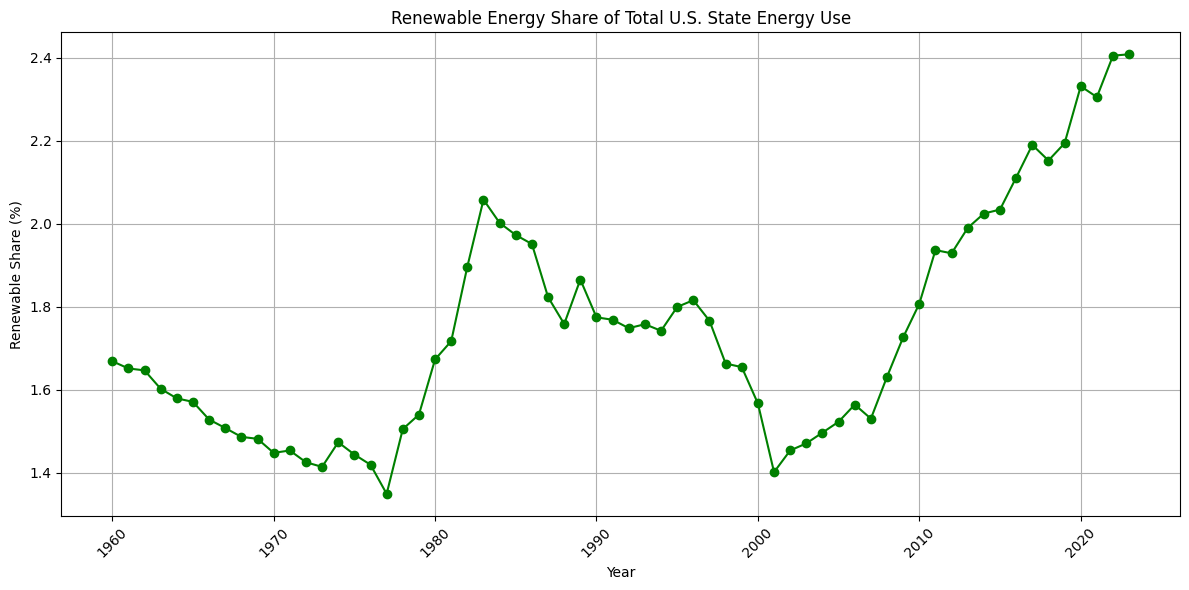

In [ ]:
# Renewable Share %
import pandas as pd
import matplotlib.pyplot as plt

# Load data
use_all_btu_df = pd.read_csv("/use_all_btu.csv")

# Filter out national total
state_df = use_all_btu_df[use_all_btu_df["State"] != "US"].copy()

# Identify year columns
year_cols = [col for col in state_df.columns if col.strip().isdigit()]
state_df[year_cols] = state_df[year_cols].apply(pd.to_numeric, errors="coerce")
state_df[year_cols] = state_df[year_cols].applymap(lambda x: x if x >= 0 else None)

# Map MSN prefixes to fuel types
msn_prefix_mapping = {
    "AB": "Biomass", "AR": "Biomass", "CL": "Coal", "CO": "Coal",
    "DF": "Distillate Fuel Oil", "DL": "Diesel", "EL": "Electricity",
    "EN": "End Use", "ES": "Electric System Loss", "FF": "Fossil Fuels",
    "GE": "Geothermal", "GO": "Gasoline", "HH": "Heat and Power",
    "HY": "Hydroelectric", "JF": "Jet Fuel", "KA": "Kerosene",
    "LO": "LPG", "LU": "Lubricants", "MG": "Motor Gasoline",
    "ML": "Miscellaneous", "NN": "Nuclear", "NG": "Natural Gas",
    "PA": "Petroleum", "PC": "Petrochemical Feedstocks",
    "RE": "Renewables", "SO": "Solar", "TE": "Total Energy",
    "WD": "Wood", "WN": "Wind", "WS": "Waste", "WY": "Wood/Wind"
}

def map_fuel_type(msn):
    prefix = msn[:2].upper()
    return msn_prefix_mapping.get(prefix, "Other")

state_df["Fuel_Type"] = state_df["MSN"].apply(map_fuel_type)

# List of renewable fuel types
renewable_labels = ["Hydroelectric", "Wind", "Solar", "Wood", "Geothermal", "Biomass", "Waste", "Wood/Wind", "Renewables"]

# Sum renewable energy use by year
renewable_df = state_df[state_df["Fuel_Type"].isin(renewable_labels)]
renewable_by_year = renewable_df[year_cols].sum()

# Total energy use by year
total_by_year = state_df[year_cols].sum()

# Compute renewable share %
renewable_share = (renewable_by_year / total_by_year) * 100

# Plot the renewable share over time
plt.figure(figsize=(12, 6))
plt.plot(renewable_share.index.astype(int), renewable_share.values, marker='o', color='green')
plt.title("Renewable Energy Share of Total U.S. State Energy Use")
plt.ylabel("Renewable Share (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

use_btu = pd.read_csv("/use_all_btu.csv")
print("Columns:", use_btu.columns.tolist())
print(use_btu.head(10))

Columns: ['Data_Status', 'State', 'MSN', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
  Data_Status State    MSN    1960    1961    1962    1963    1964    1965  \
0       2023F    AK  ABICB     0.0     0.0     0.0     0.0     0.0     0.0   
1       2023F    AK  ARICB   312.0   555.0   489.0   589.0   791.0   878.0   
2       2023F    AK  ARTCB   312.0   555.0   489.0   589.0   791.0   878.0   
3       2023F    AK  ARTXB   312.0   555.0   489.0   589.0   791.0   878.0   
4       2023F    AK  AVACB  5209.0  6441.0  5202.0  3273.

In [ ]:
#Table 1
import pandas as pd
import numpy as np
import zipfile
from pathlib import Path

# ========================
# Config
# ========================
ACS_ZIP = Path("/ACSST1Y2022.S1901_2025-07-26T140549.zip")
MIT_CSV = Path("/1976-2020-president.csv")
SEDS_WIDE = Path("/use_all_btu.csv")
DEBUG = False

# ========================
# Helpers
# ========================
USPS_TO_NAME = {
    "AL": "Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
    "CT":"Connecticut","DE":"Delaware","DC":"District of Columbia","FL":"Florida","GA":"Georgia",
    "HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky",
    "LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota",
    "MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
    "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
    "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island",
    "SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont",
    "VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"
}

def to_full_state_name(s):
    """If value looks like a 2-letter USPS code, map to full name, else return as-is."""
    if isinstance(s, str) and len(s) == 2 and s.upper() in USPS_TO_NAME:
        return USPS_TO_NAME[s.upper()]
    return s

# ========================
# 1) ACS median income
# ========================
def load_acs_median_income_from_zip(zip_path: Path) -> pd.DataFrame:
    """
    Tries multiple strategies to locate the Median Household Income column in the ACS S1901 zip.
    Returns: DataFrame with ['state', 'median_income'].
    """
    with zipfile.ZipFile(zip_path) as z:
        csv_members = [m for m in z.namelist() if m.lower().endswith(".csv")]
        if not csv_members:
            raise FileNotFoundError("No CSVs found inside ACS ZIP.")

        # 1) If a metadata CSV exists, try to locate the right var name
        meta_member = next((m for m in csv_members if "metadata" in m.lower()), None)
        income_var = None
        if meta_member:
            with z.open(meta_member) as f:
                meta = pd.read_csv(f, low_memory=False)
            if DEBUG:
                print("ACS metadata columns:", meta.columns.tolist())

            # Try to find label column
            label_col = next((c for c in meta.columns if "label" in c.lower()), None)
            name_col = next((c for c in meta.columns if c.lower() in ("name", "column id", "column_name")), None)

            if label_col and name_col:
                # Look for the median income variable
                candidates = meta[meta[label_col].str.contains("Median household income", case=False, na=False)]
                if not candidates.empty:
                    income_var = candidates[name_col].iloc[0]

        # 2) Load the main data CSV (pick the first non-metadata CSV)
        data_member = next((m for m in csv_members if "metadata" not in m.lower()), None)
        if data_member is None:
            raise FileNotFoundError("No data CSV (non-metadata) found inside the ACS ZIP.")

        with z.open(data_member) as f:
            acs = pd.read_csv(f, low_memory=False)

        if DEBUG:
            print("ACS data columns (first 20):", acs.columns.tolist()[:20])

        # 3) If we couldn't locate income_var, try common codes or name search
        if income_var is None:
            # Most common code in S1901 for median household income is S1901_C01_012E.
            if "S1901_C01_012E" in acs.columns:
                income_var = "S1901_C01_012E"
            else:
                # fallback: any column that has both 'median' and 'income'
                poss = [c for c in acs.columns if "median" in c.lower() and "income" in c.lower()]
                if poss:
                    income_var = poss[0]
                else:
                    raise ValueError("Could not find a median income variable in ACS.")

        # State column
        name_col = "NAME" if "NAME" in acs.columns else acs.columns[0]
        out = acs[[name_col, income_var]].rename(columns={name_col: "state", income_var: "median_income"})
        out["median_income"] = pd.to_numeric(out["median_income"], errors="coerce")

        # Clean state string if it contains qualifiers
        out["state"] = out["state"].str.replace(r" state,.*$", "", regex=True)
        return out[["state", "median_income"]]

# ========================
# 2) MIT -> political_score
# ========================
def load_political_score(mit_csv: Path) -> pd.DataFrame:
    df = pd.read_csv(mit_csv, low_memory=False)

    # state column
    state_col = next((c for c in ["state", "state_name", "state_po"] if c in df.columns), None)
    if state_col is None:
        raise ValueError(f"Couldn't find a state column. Saw: {list(df.columns)[:20]}")

    if "year" not in df.columns:
        raise ValueError("'year' column missing in MIT file.")
    df = df[df["year"].between(2008, 2020)]

    candvote_col = next((c for c in ["candidatevotes", "candidate_votes"] if c in df.columns), None)
    totalvote_col = next((c for c in ["totalvotes", "total_votes"] if c in df.columns), None)
    if candvote_col is None or totalvote_col is None:
        raise ValueError("Missing candidate/total votes cols. Need candidatevotes|candidate_votes and totalvotes|total_votes.")

    party_col = next((c for c in ["party", "party_simplified", "party_detailed"] if c in df.columns), None)
    if party_col is None:
        raise ValueError("Missing party column (party / party_simplified / party_detailed).")

    df[candvote_col] = pd.to_numeric(df[candvote_col], errors="coerce")
    df[totalvote_col] = pd.to_numeric(df[totalvote_col], errors="coerce")
    df = df[df[totalvote_col] > 0]
    df["vote_share"] = df[candvote_col] / df[totalvote_col]

    def norm_party(x):
        if pd.isna(x):
            return "other"
        x = str(x).lower()
        if "dem" in x:
            return "dem"
        if "rep" in x or "gop" in x:
            return "rep"
        return "other"

    df["party_norm"] = df[party_col].apply(norm_party)
    agg = (df.pivot_table(index=[state_col, "year"], columns="party_norm", values="vote_share", aggfunc="sum")
             .reset_index().rename_axis(None, axis=1))
    for c in ["dem", "rep"]:
        if c not in agg.columns:
            agg[c] = 0.0
    agg["dem_margin"] = agg["dem"] - agg["rep"]

    pol = agg.groupby(state_col)["dem_margin"].mean().reset_index()
    pol.rename(columns={state_col: "state", "dem_margin": "political_score"}, inplace=True)

    # Map USPS to full if needed
    if pol["state"].str.len().eq(2).all():
        pol["state"] = pol["state"].map(USPS_TO_NAME)

    return pol

# ========================
# 3) SEDS -> fossil shares using MSN patterns
# ========================
def compute_fossil_share_from_seds_wide(seds_path: Path,
                                        year1=2010,
                                        year2=2022) -> pd.DataFrame:
    """
    SEDS wide format: columns = ['Data_Status', 'State', 'MSN', '1960', ... '2023'].
    We'll:
      - melt to long
      - select MSNs for electric power sector (3rd char = 'E') and unit 'B' (BTU) (5th char)
      - fossil: fuel code in first 2 chars in {'CL','NG','PE'}
      - total electric power: first 2 chars == 'TE'
    Returns: state, fossil_share_year1, fossil_share_year2, delta_fossil_share
    """
    df = pd.read_csv(seds_path)
    year_cols = [c for c in df.columns if re_year(c)]
    long = df.melt(id_vars=["State", "MSN"], value_vars=year_cols,
                   var_name="Year", value_name="Data").dropna(subset=["Data"])
    long["Year"] = long["Year"].astype(int)

    # only keep BTU (ending with 'B') & Electric Power sector (3rd char 'E')
    # some MSNs may not be length 5; protect with checks
    long = long[long["MSN"].str.len() >= 5]
    long = long[long["MSN"].str.endswith("B")]  # BTU
    long = long[long["MSN"].str[2] == "E"]      # Electric Power Sector

    # fossil fuels
    fossil_fuels = {"CL", "NG", "PE"}
    fossil_mask = long["MSN"].str[:2].isin(fossil_fuels)
    fossil = (long[fossil_mask]
              .groupby(["State", "Year"])["Data"].sum()
              .reset_index(name="fossil_btu"))

    # total electric power
    total_mask = long["MSN"].str[:2].eq("TE")
    total = (long[total_mask]
             .groupby(["State", "Year"])["Data"].sum()
             .reset_index(name="total_btu"))

    merged = total.merge(fossil, on=["State", "Year"], how="left")
    merged["fossil_share"] = (merged["fossil_btu"] / merged["total_btu"]) * 100

    # get requested years
    subset = merged[merged["Year"].isin([year1, year2])].pivot(index="State", columns="Year", values="fossil_share")
    subset.columns = [f"fossil_share_{y}" for y in [year1, year2]]
    subset["delta_fossil_share"] = subset[f"fossil_share_{year1}"] - subset[f"fossil_share_{year2}"]
    subset = subset.reset_index().rename(columns={"State": "state"})

    # map USPS if needed (SEDS often uses postal codes)
    if subset["state"].str.len().eq(2).all():
        subset["state"] = subset["state"].map(USPS_TO_NAME)

    return subset

def re_year(col):
    try:
        y = int(col)
        return 1900 <= y <= 2100
    except:
        return False

# ========================
# 4) Table 1
# ========================
def make_table1(df, continuous_cols):
    t = df[continuous_cols].agg(['count', 'mean', 'std', 'median', 'min', 'max']).T
    t['skew'] = df[continuous_cols].skew()
    t['kurtosis'] = df[continuous_cols].kurtosis()
    return t.round(2)

# ========================
# MAIN
# ========================
def main():
    # 1) ACS
    acs = load_acs_median_income_from_zip(ACS_ZIP)

    # 2) MIT political score
    pol = load_political_score(MIT_CSV)

    # 3) SEDS fossil share (2010 vs 2022)
    fossil = compute_fossil_share_from_seds_wide(SEDS_WIDE, 2010, 2022)

    # merge
    df = fossil.merge(acs, on="state", how="left").merge(pol, on="state", how="left")

    # success flag (optional)
    thr = df["delta_fossil_share"].median()
    df["success"] = (df["delta_fossil_share"] > thr).astype(int)

    # Table 1
    continuous_cols = [
        "fossil_share_2010",
        "fossil_share_2022",
        "delta_fossil_share",
        "median_income",
        "political_score"
    ]
    table1 = make_table1(df, continuous_cols)
    table1.to_csv("table1_continuous.csv")
    print("\n=== Table 1 ===")
    print(table1)

    # Stratified (optional)
    table1_by_success = (df.groupby("success")[continuous_cols]
                           .agg(['count','mean','std','median','min','max'])
                           .round(2))
    table1_by_success.to_csv("table1_continuous_by_success.csv")
    print("\n=== Table 1 (by success) ===")
    print(table1_by_success.head())

    print("\nSaved: table1_continuous.csv, table1_continuous_by_success.csv")

if __name__ == "__main__":
    main()



=== Table 1 ===
                    count      mean       std    median       min        max  \
fossil_share_2010    52.0     67.74     24.99     69.51      0.00      99.03   
fossil_share_2022    52.0     61.66     24.27     62.51      0.00      97.77   
delta_fossil_share   52.0      6.08      8.47      5.73    -18.45      23.65   
median_income        51.0  74445.51  12307.51  71970.00  52719.00  101027.00   
political_score       0.0       NaN       NaN       NaN       NaN        NaN   

                    skew  kurtosis  
fossil_share_2010  -0.86      0.51  
fossil_share_2022  -0.68      0.17  
delta_fossil_share -0.17      0.59  
median_income       0.32     -0.74  
political_score      NaN       NaN  

=== Table 1 (by success) ===
        fossil_share_2010                                     \
                    count   mean    std median    min    max   
success                                                        
0                      26  67.40  28.06  71.49   0.00  99.

In [ ]:
#Table 2
import pandas as pd
import numpy as np
import zipfile
from pathlib import Path
from scipy import stats
import uuid

# -------------------- paths --------------------
ACS_ZIP = Path("/ACSST1Y2022.S1901_2025-07-26T140549.zip")
MIT_CSV = Path("/1976-2020-president.csv")
SEDS_WIDE = Path("/use_all_btu.csv")
DSIRE_RPS = Path("/dsire_rps_summary.csv")

# -------------------- helpers --------------------
USPS_TO_NAME = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
    "CT":"Connecticut","DE":"Delaware","DC":"District of Columbia","FL":"Florida","GA":"Georgia",
    "HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky",
    "LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota",
    "MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
    "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
    "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island",
    "SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont",
    "VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"
}

def to_full_state_name(s):
    return USPS_TO_NAME.get(str(s).upper(), s) if isinstance(s, str) and len(s) == 2 else s

def re_year(c):
    try:
        y = int(c); return 1900 <= y <= 2100
    except:
        return False

def first_like(df, *prefixes):
    for p in prefixes:
        for c in df.columns:
            if c.startswith(p):
                return c
    return None

def drop_like(df, prefix):
    return df.loc[:, [c for c in df.columns if not c.startswith(prefix)]].copy()

def add_success_flag(df, base="success_flag"):
    df = drop_like(df, base)
    y = f"{base}_{uuid.uuid4().hex[:8]}"
    thr = df["delta_fossil_share"].median()
    df[y] = (df["delta_fossil_share"] > thr).astype(int)
    return df, y

# -------------------- loaders --------------------
def load_acs(zip_path: Path):
    with zipfile.ZipFile(zip_path) as z:
        csvs = [m for m in z.namelist() if m.lower().endswith(".csv")]
        meta = next((m for m in csvs if "metadata" in m.lower()), None)
        income_var = None
        if meta:
            with z.open(meta) as f:
                m = pd.read_csv(f, low_memory=False)
            label_col = next((c for c in m.columns if "label" in c.lower()), None)
            name_col  = next((c for c in m.columns if c.lower() in ("name","column id","column_name")), None)
            if label_col and name_col and label_col in m and name_col in m:
                hit = m[m[label_col].str.contains("Median household income", case=False, na=False)]
                if not hit.empty: income_var = hit[name_col].iloc[0]
        data_csv = next(m for m in csvs if "metadata" not in m.lower())
        with z.open(data_csv) as f:
            acs = pd.read_csv(f, low_memory=False)

    if income_var is None:
        income_var = "S1901_C01_012E" if "S1901_C01_012E" in acs.columns else \
                     next(c for c in acs.columns if "median" in c.lower() and "income" in c.lower())

    name_col = "NAME" if "NAME" in acs.columns else acs.columns[0]
    out = acs[[name_col, income_var]].rename(columns={name_col:"state", income_var:"median_income"})
    out["median_income"] = pd.to_numeric(out["median_income"], errors="coerce")
    out["state"] = out["state"].str.replace(r" state,.*$", "", regex=True)
    return out

def load_political_score(path: Path):
    df = pd.read_csv(path, low_memory=False)
    state_col = next(c for c in ["state","state_name","state_po"] if c in df.columns)
    df = df[df["year"].between(2008, 2020)]
    candvote = next(c for c in ["candidatevotes","candidate_votes"] if c in df.columns)
    totalvote = next(c for c in ["totalvotes","total_votes"] if c in df.columns)
    party_col = next(c for c in ["party","party_simplified","party_detailed"] if c in df.columns)
    df[candvote] = pd.to_numeric(df[candvote], errors="coerce")
    df[totalvote] = pd.to_numeric(df[totalvote], errors="coerce")
    df = df[df[totalvote] > 0]
    df["vote_share"] = df[candvote] / df[totalvote]
    def norm(p):
        if pd.isna(p): return "other"
        p = str(p).lower()
        if "dem" in p: return "dem"
        if "rep" in p or "gop" in p: return "rep"
        return "other"
    df["party_norm"] = df[party_col].apply(norm)
    ct = df.pivot_table(index=[state_col,"year"], columns="party_norm", values="vote_share", aggfunc="sum").reset_index()
    for c in ["dem","rep"]:
        if c not in ct: ct[c] = 0.0
    ct["dem_margin"] = ct["dem"] - ct["rep"]
    pol = ct.groupby(state_col)["dem_margin"].mean().reset_index()
    pol.columns = ["state","political_score"]
    if pol["state"].str.len().eq(2).all():
        pol["state"] = pol["state"].map(USPS_TO_NAME)
    return pol

def fossil_shares_from_seds(path: Path, y1=2010, y2=2022):
    df = pd.read_csv(path)
    years = [c for c in df.columns if re_year(c)]
    long = df.melt(id_vars=["State","MSN"], value_vars=years, var_name="Year", value_name="Data").dropna()
    long["Year"] = long["Year"].astype(int)
    long = long[long["MSN"].str.len() >= 5]
    long = long[long["MSN"].str.endswith("B")]
    long = long[long["MSN"].str[2] == "E"]
    fossil = long[long["MSN"].str[:2].isin({"CL","NG","PE"})].groupby(["State","Year"])["Data"].sum().reset_index(name="fossil_btu")
    total  = long[long["MSN"].str[:2].eq("TE")].groupby(["State","Year"])["Data"].sum().reset_index(name="total_btu")
    m = total.merge(fossil, on=["State","Year"], how="left")
    m["fossil_share"] = (m["fossil_btu"] / m["total_btu"]) * 100
    wide = m[m["Year"].isin([y1,y2])].pivot(index="State", columns="Year", values="fossil_share")
    wide.columns = [f"fossil_share_{y1}", f"fossil_share_{y2}"]
    wide["delta_fossil_share"] = wide[f"fossil_share_{y1}"] - wide[f"fossil_share_{y2}"]
    wide = wide.reset_index().rename(columns={"State":"state"})
    if wide["state"].str.len().eq(2).all():
        wide["state"] = wide["state"].map(USPS_TO_NAME)
    return wide

def load_dsire(path: Path):
    rps = pd.read_csv(path)
    state_col = next(c for c in rps.columns if c.lower() in ["state","state_name","state_po"])
    rps = rps.rename(columns={state_col:"state"})
    rps["state"] = rps["state"].apply(to_full_state_name)
    if "rps_present" not in rps:
        if "rps_target_pct" in rps:
            rps["rps_present"] = (rps["rps_target_pct"].fillna(0) > 0).astype(int)
        else:
            rps["rps_present"] = 0
    if "rps_target_pct" not in rps:
        rps["rps_target_pct"] = np.nan
    if rps["rps_target_pct"].notna().sum() >= 4:
        rps["rps_target_quartile"] = pd.qcut(rps["rps_target_pct"].fillna(0), 4, labels=["Q1","Q2","Q3","Q4"])
    else:
        rps["rps_target_quartile"] = np.nan
    return rps[["state","rps_present","rps_target_pct","rps_target_quartile"]]

# ---------- tables ----------
def chisq(df, cat_col, y):
    tab = pd.crosstab(df[cat_col], df[y])
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    return stats.chi2_contingency(tab)[1]

def table2a(df, cats):
    out, n = [], len(df)
    for c in cats:
        vc = df[c].astype("object").value_counts(dropna=False)
        tmp = vc.reset_index(); tmp.columns = ["level","count"]
        tmp["percent"] = tmp["count"] / n * 100
        tmp["variable"] = c
        out.append(tmp[["variable","level","count","percent"]])
    return pd.concat(out, ignore_index=True)

def table2b(df, cats, y):
    out = []
    for c in cats:
        if c == y:  # skip the outcome itself; we'll show others vs outcome
            continue
        ct = pd.crosstab(df[c].astype("object"), df[y], dropna=False)
        counts = ct.reset_index().melt(id_vars=c, var_name="outcome", value_name="count")
        denom  = ct.sum(axis=0).replace(0, np.nan)
        perc   = (ct / denom * 100).reset_index().melt(id_vars=c, var_name="outcome", value_name="percent")
        m = counts.merge(perc, on=[c,"outcome"]).rename(columns={c:"level"})
        m["variable"] = c
        m["p_value"] = chisq(df, c, y)
        out.append(m[["variable","level","outcome","count","percent","p_value"]])
    return pd.concat(out, ignore_index=True)

def table2c(df, conts, y):
    g = df.groupby(y)[conts].agg(['count','mean','std','median','min','max']).round(2)
    g.columns = ['_'.join(col) for col in g.columns]
    return g.reset_index()

# ---------- main ----------
def main():
    # Load & merge
    acs = load_acs(ACS_ZIP)
    pol = load_political_score(MIT_CSV)
    fos = fossil_shares_from_seds(SEDS_WIDE, 2010, 2022)
    rps = load_dsire(DSIRE_RPS)

    merged = fos.merge(acs, on="state", how="left")
    merged = merged.merge(pol, on="state", how="left")
    merged = merged.merge(rps, on="state", how="left")

    # create clean success flag
    merged, ycol = add_success_flag(merged)

    # engineer categories
    pol_col = first_like(merged, "political_score")
    inc_col = first_like(merged, "median_income")
    if pol_col:
        merged["political_bucket"] = np.where(merged[pol_col].fillna(0) >= 0,
                                              "Liberal-leaning", "Conservative-leaning")
    else:
        merged["political_bucket"] = np.nan
    if inc_col and merged[inc_col].notna().sum() >= 4:
        merged["income_quartile"] = pd.qcut(merged[inc_col], 4, labels=["Q1","Q2","Q3","Q4"])
    else:
        merged["income_quartile"] = np.nan

    # clean tiny DF with fixed outcome name
    Y = "Y_OUTCOME"
    work = pd.DataFrame({
        Y: merged[ycol],
        "rps_present": merged[first_like(merged, "rps_present")] if first_like(merged, "rps_present") else np.nan,
        "rps_target_quartile": merged[first_like(merged, "rps_target_quartile")] if first_like(merged, "rps_target_quartile") else np.nan,
        "political_bucket": merged["political_bucket"],
        "income_quartile": merged["income_quartile"],
        "fossil_share_2010": merged[first_like(merged, "fossil_share_2010")] if first_like(merged, "fossil_share_2010") else np.nan,
        "fossil_share_2022": merged[first_like(merged, "fossil_share_2022")] if first_like(merged, "fossil_share_2022") else np.nan,
        "delta_fossil_share": merged[first_like(merged, "delta_fossil_share")] if first_like(merged, "delta_fossil_share") else np.nan,
        "median_income": merged[inc_col] if inc_col else np.nan,
        "political_score": merged[pol_col] if pol_col else np.nan,
        "rps_target_pct": merged[first_like(merged, "rps_target_pct")] if first_like(merged, "rps_target_pct") else np.nan
    })

    # final dup guard
    dups = work.columns[work.columns.duplicated(keep=False)]
    if len(dups):
        # rename duplicates
        seen = {}
        new_cols = []
        for col in work.columns:
            if col not in seen:
                seen[col] = 0
                new_cols.append(col)
            else:
                seen[col] += 1
                new_cols.append(f"{col}__dup{seen[col]}")
        work.columns = new_cols

    cat_cols = [c for c in [Y, "rps_present", "rps_target_quartile", "political_bucket", "income_quartile"] if c in work.columns]
    cont_cols = [c for c in ["fossil_share_2010", "fossil_share_2022", "delta_fossil_share",
                             "median_income", "political_score", "rps_target_pct"] if c in work.columns]

    # Make the tables
    t2a = table2a(work, cat_cols)
    t2b = table2b(work, cat_cols, Y)
    t2c = table2c(work, cont_cols, Y)

    # Save & print
    t2a.to_csv("table2a_categoricals_overall.csv", index=False)
    t2b.to_csv("table2b_categoricals_by_success.csv", index=False)
    t2c.to_csv("table2c_continuous_by_success.csv", index=False)

    print("\n=== Table 2a ===")
    print(t2a.to_markdown(index=False))
    print("\n=== Table 2b ===")
    print(t2b.to_markdown(index=False))
    print("\n=== Table 2c ===")
    print(t2c.to_markdown(index=False))
    print("\nOutcome column used:", Y)

if __name__ == "__main__":
    main()



=== Table 2a ===
| variable            | level           |   count |   percent |
|:--------------------|:----------------|--------:|----------:|
| Y_OUTCOME           | 0               |      26 |  50       |
| Y_OUTCOME           | 1               |      26 |  50       |
| rps_present         | 0.0             |      37 |  71.1538  |
| rps_present         | nan             |      15 |  28.8462  |
| rps_target_quartile | nan             |      52 | 100       |
| political_bucket    | Liberal-leaning |      52 | 100       |
| income_quartile     | Q4              |      13 |  25       |
| income_quartile     | Q1              |      13 |  25       |
| income_quartile     | Q2              |      13 |  25       |
| income_quartile     | Q3              |      12 |  23.0769  |
| income_quartile     | nan             |       1 |   1.92308 |

=== Table 2b ===
| variable            | level           |   outcome |   count |   percent |    p_value |
|:--------------------|:----------------|--

In [ ]:
import pandas as pd
rps = pd.read_csv("/dsire_rps_summary.csv")
print("Columns:", rps.columns)
print(rps.head(10))

Columns: Index(['State', 'Target', 'Year', 'Clean_Energy_Target', 'Clean_Energy_Year'], dtype='object')
  State Target    Year Clean_Energy_Target  Clean_Energy_Year
0    WA    15%  2020.0                100%             2045.0
1    OR    50%  2040.0                100%             2040.0
2    CA    60%  2030.0                100%             2045.0
3    NV    50%  2030.0                100%             2050.0
4    UT    20%  2025.0                 NaN                NaN
5    AZ    15%  2025.0                 NaN                NaN
6    ND    10%  2015.0                 NaN                NaN
7    NM    80%  2040.0                100%             2045.0
8    HI   100%  2045.0                 NaN                NaN
9    CO    30%  2020.0                100%             2050.0


In [ ]:
# =========================
# Table 2 (final version)
# =========================
import pandas as pd
import numpy as np
import zipfile
from pathlib import Path
from scipy import stats
import uuid
import re

# -------------------- paths --------------------
ACS_ZIP = Path("/ACSST1Y2022.S1901_2025-07-26T140549.zip")
MIT_CSV = Path("/1976-2020-president.csv")
SEDS_WIDE = Path("/use_all_btu.csv")
DSIRE_RPS = Path("/dsire_rps_summary.csv")

# -------------------- config --------------------
KEEP_DC = True  # set to False if you want ONLY the 50 states

# -------------------- helpers --------------------
USPS_TO_NAME = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
    "CT":"Connecticut","DE":"Delaware","DC":"District of Columbia","FL":"Florida","GA":"Georgia",
    "HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky",
    "LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota",
    "MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
    "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
    "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island",
    "SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont",
    "VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"
}
VALID_STATES = set(USPS_TO_NAME.values())
if KEEP_DC:
    VALID_STATES.add("District of Columbia")

def normalize_state_name(x):
    if pd.isna(x):
        return x
    x = str(x).strip()
    if len(x) == 2 and x.upper() in USPS_TO_NAME:
        return USPS_TO_NAME[x.upper()]
    return x.title()

def normalize_states(df, col):
    if col in df:
        df[col] = df[col].apply(normalize_state_name)
    return df

def filter_valid_states(df, col="state"):
    return df[df[col].isin(VALID_STATES)].copy()

def re_year(c):
    try:
        y = int(c); return 1900 <= y <= 2100
    except:
        return False

def first_like(df, *prefixes):
    for p in prefixes:
        for c in df.columns:
            if c.startswith(p):
                return c
    return None

def drop_like(df, prefix):
    return df.loc[:, [c for c in df.columns if not c.startswith(prefix)]].copy()

def add_success_flag(df, base="success_flag"):
    df = drop_like(df, base)
    y = f"{base}_{uuid.uuid4().hex[:8]}"
    thr = df["delta_fossil_share"].median()
    df[y] = (df["delta_fossil_share"] > thr).astype(int)
    return df, y

def pick_real(df, base):
    if base in df.columns:
        return base
    for c in df.columns:
        if c == base or c.startswith(base + "__dup"):
            return c
    return None

# -------------------- loaders --------------------
def load_acs(zip_path: Path):
    with zipfile.ZipFile(zip_path) as z:
        csvs = [m for m in z.namelist() if m.lower().endswith(".csv")]
        meta = next((m for m in csvs if "metadata" in m.lower()), None)
        income_var = None
        if meta:
            with z.open(meta) as f:
                m = pd.read_csv(f, low_memory=False)
            label_col = next((c for c in m.columns if "label" in c.lower()), None)
            name_col  = next((c for c in m.columns if c.lower() in ("name","column id","column_name")), None)
            if label_col and name_col and label_col in m and name_col in m:
                hit = m[m[label_col].str.contains("Median household income", case=False, na=False)]
                if not hit.empty: income_var = hit[name_col].iloc[0]
        data_csv = next(m for m in csvs if "metadata" not in m.lower())
        with z.open(data_csv) as f:
            acs = pd.read_csv(f, low_memory=False)

    if income_var is None:
        income_var = "S1901_C01_012E" if "S1901_C01_012E" in acs.columns else \
                     next(c for c in acs.columns if "median" in c.lower() and "income" in c.lower())

    name_col = "NAME" if "NAME" in acs.columns else acs.columns[0]
    out = acs[[name_col, income_var]].rename(columns={name_col:"state", income_var:"median_income"})
    out["median_income"] = pd.to_numeric(out["median_income"], errors="coerce")
    out["state"] = out["state"].str.replace(r" state,.*$", "", regex=True)
    out = normalize_states(out, "state")
    out = filter_valid_states(out, "state")
    return out

def load_political_score(path: Path):
    df = pd.read_csv(path, low_memory=False)
    state_col = next(c for c in ["state","state_name","state_po"] if c in df.columns)
    df = df[df["year"].between(2008, 2020)]
    candvote  = next(c for c in ["candidatevotes","candidate_votes"] if c in df.columns)
    totalvote = next(c for c in ["totalvotes","total_votes"] if c in df.columns)
    party_col = next(c for c in ["party","party_simplified","party_detailed"] if c in df.columns)

    df[candvote] = pd.to_numeric(df[candvote], errors="coerce")
    df[totalvote] = pd.to_numeric(df[totalvote], errors="coerce")
    df = df[df[totalvote] > 0]
    df["vote_share"] = df[candvote] / df[totalvote]

    def norm(p):
        if pd.isna(p): return "other"
        p = str(p).lower()
        if "dem" in p: return "dem"
        if "rep" in p or "gop" in p: return "rep"
        return "other"

    df["party_norm"] = df[party_col].apply(norm)
    ct = df.pivot_table(index=[state_col,"year"], columns="party_norm",
                        values="vote_share", aggfunc="sum").reset_index()
    for c in ["dem","rep"]:
        if c not in ct: ct[c] = 0.0
    ct["dem_margin"] = ct["dem"] - ct["rep"]
    pol = ct.groupby(state_col)["dem_margin"].mean().reset_index()
    pol.columns = ["state","political_score"]
    pol = normalize_states(pol, "state")
    pol = filter_valid_states(pol, "state")
    return pol

def fossil_shares_from_seds(path: Path, y1=2010, y2=2022):
    df = pd.read_csv(path)
    years = [c for c in df.columns if re_year(c)]
    long = df.melt(id_vars=["State","MSN"], value_vars=years,
                   var_name="Year", value_name="Data").dropna()
    long["Year"] = long["Year"].astype(int)
    long = long[long["MSN"].str.len() >= 5]
    long = long[long["MSN"].str.endswith("B")]
    long = long[long["MSN"].str[2] == "E"]
    fossil = long[long["MSN"].str[:2].isin({"CL","NG","PE"})] \
              .groupby(["State","Year"])["Data"].sum().reset_index(name="fossil_btu")
    total  = long[long["MSN"].str[:2].eq("TE")] \
              .groupby(["State","Year"])["Data"].sum().reset_index(name="total_btu")
    m = total.merge(fossil, on=["State","Year"], how="left")
    m["fossil_share"] = (m["fossil_btu"] / m["total_btu"]) * 100
    wide = m[m["Year"].isin([y1,y2])].pivot(index="State", columns="Year", values="fossil_share")
    wide.columns = [f"fossil_share_{y1}", f"fossil_share_{y2}"]
    wide["delta_fossil_share"] = wide[f"fossil_share_{y1}"] - wide[f"fossil_share_{y2}"]
    wide = wide.reset_index().rename(columns={"State":"state"})
    wide = normalize_states(wide, "state")
    wide = filter_valid_states(wide, "state")
    return wide

def load_dsire(path: Path):
    """
    Your dsire_rps_summary.csv looks like:
    Columns: ['State', 'Target', 'Year', 'Clean_Energy_Target', 'Clean_Energy_Year']
    We will:
      - map 'State' (2-letter) -> full state name
      - convert 'Target' (e.g. '15%') -> numeric rps_target_pct
      - build rps_present and quartiles
    """
    rps = pd.read_csv(path, low_memory=False)

    # rename and normalize
    rps = rps.rename(columns={"State": "state", "Target": "rps_target_pct"})
    rps["state"] = rps["state"].map(USPS_TO_NAME)  # from 2-letter to full state
    rps = filter_valid_states(rps, "state")

    # numeric %
    rps["rps_target_pct"] = (
        rps["rps_target_pct"]
        .astype(str)
        .str.replace("%", "", regex=False)
    )
    rps["rps_target_pct"] = pd.to_numeric(rps["rps_target_pct"], errors="coerce")

    # rps_present
    rps["rps_present"] = (rps["rps_target_pct"].fillna(0) > 0).astype(int)

    # quartiles if possible
    if rps["rps_target_pct"].notna().sum() >= 4:
        rps["rps_target_quartile"] = pd.qcut(
            rps["rps_target_pct"].fillna(0), 4, labels=["Q1","Q2","Q3","Q4"]
        )
    else:
        rps["rps_target_quartile"] = np.nan

    return rps[["state", "rps_present", "rps_target_pct", "rps_target_quartile"]]

# ---------- tables ----------
def chisq(df, cat_col, y):
    tab = pd.crosstab(df[cat_col], df[y])
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    return stats.chi2_contingency(tab)[1]

def table2a(df, cats):
    out, n = [], len(df)
    for c in cats:
        vc = df[c].astype("object").value_counts(dropna=False)
        tmp = vc.reset_index(); tmp.columns = ["level","count"]
        tmp["percent"] = tmp["count"] / n * 100
        tmp["variable"] = c
        out.append(tmp[["variable","level","count","percent"]])
    return pd.concat(out, ignore_index=True)

def table2b(df, cats, y):
    out = []
    for c in cats:
        if c == y:
            continue
        ct = pd.crosstab(df[c].astype("object"), df[y], dropna=False)
        counts = ct.reset_index().melt(id_vars=c, var_name="outcome", value_name="count")
        denom  = ct.sum(axis=0).replace(0, np.nan)
        perc   = (ct / denom * 100).reset_index().melt(id_vars=c, var_name="outcome", value_name="percent")
        m = counts.merge(perc, on=[c,"outcome"]).rename(columns={c:"level"})
        m["variable"] = c
        m["p_value"] = chisq(df, c, y)
        out.append(m[["variable","level","outcome","count","percent","p_value"]])
    return pd.concat(out, ignore_index=True)

def table2c(df, conts, y):
    g = df.groupby(y)[conts].agg(['count','mean','std','median','min','max']).round(2)
    g.columns = ['_'.join(col) for col in g.columns]
    return g.reset_index()

# ---------- main ----------
def main():
    # Load
    acs = load_acs(ACS_ZIP)
    pol = load_political_score(MIT_CSV)
    fos = fossil_shares_from_seds(SEDS_WIDE, 2010, 2022)
    rps = load_dsire(DSIRE_RPS)

    # Merge
    merged = fos.merge(acs, on="state", how="left")
    merged = merged.merge(pol, on="state", how="left")
    merged = merged.merge(rps, on="state", how="left")

    print("\n=== AFTER MERGE ===")
    print("Rows:", len(merged))
    print("political_score non-null:", merged["political_score"].notna().sum() if "political_score" in merged else 0)
    print("rps_target_pct  non-null:", merged["rps_target_pct"].notna().sum()  if "rps_target_pct"  in merged else 0)

    # success flag
    merged, ycol = add_success_flag(merged)

    # engineered categoricals
    pol_col = first_like(merged, "political_score")
    inc_col = first_like(merged, "median_income")

    if pol_col:
        merged["political_bucket"] = np.where(merged[pol_col].fillna(0) >= 0,
                                              "Liberal-leaning", "Conservative-leaning")
    else:
        merged["political_bucket"] = np.nan
    if inc_col and merged[inc_col].notna().sum() >= 4:
        merged["income_quartile"] = pd.qcut(merged[inc_col], 4, labels=["Q1","Q2","Q3","Q4"])
    else:
        merged["income_quartile"] = np.nan

    # tiny DF with fixed outcome name
    Y = "Y_OUTCOME"

    def safe_get(colname):
        return merged[colname] if colname and (colname in merged.columns) else np.nan

    work = pd.DataFrame({
        Y: merged[ycol],
        "rps_present": safe_get(first_like(merged, "rps_present")),
        "rps_target_quartile": safe_get(first_like(merged, "rps_target_quartile")),
        "political_bucket": merged["political_bucket"],
        "income_quartile": merged["income_quartile"],
        "fossil_share_2010": safe_get(first_like(merged, "fossil_share_2010")),
        "fossil_share_2022": safe_get(first_like(merged, "fossil_share_2022")),
        "delta_fossil_share": safe_get(first_like(merged, "delta_fossil_share")),
        "median_income": safe_get(inc_col),
        "political_score": safe_get(pol_col),
        "rps_target_pct": safe_get(first_like(merged, "rps_target_pct"))
    })

    # dedupe guard
    dups = work.columns[work.columns.duplicated(keep=False)]
    if len(dups):
        seen = {}
        new_cols = []
        for col in work.columns:
            if col not in seen:
                seen[col] = 0
                new_cols.append(col)
            else:
                seen[col] += 1
                new_cols.append(f"{col}__dup{seen[col]}")
        work.columns = new_cols

    # re-pick actual names (in case they were suffixed)
    ps_col  = pick_real(work, "political_score")
    rtp_col = pick_real(work, "rps_target_pct")

    if ps_col:  work[ps_col]  = pd.to_numeric(work[ps_col], errors="coerce")
    if rtp_col: work[rtp_col] = pd.to_numeric(work[rtp_col], errors="coerce")

    cat_cols = [c for c in [Y, "rps_present", "rps_target_quartile", "political_bucket", "income_quartile"] if c in work.columns]

    base_cont = ["fossil_share_2010", "fossil_share_2022", "delta_fossil_share", "median_income"]
    if ps_col:  base_cont.append(ps_col)
    if rtp_col: base_cont.append(rtp_col)
    cont_cols = [c for c in base_cont if c in work.columns]

    print("\n=== Non-null counts in `work` (continuous) ===")
    for c in cont_cols:
        print(f"  {c}: {work[c].notna().sum()}")

    # Tables
    t2a = table2a(work, cat_cols)
    t2b = table2b(work, cat_cols, Y)
    t2c = table2c(work, cont_cols, Y)

    # Save & print
    t2a.to_csv("table2a_categoricals_overall.csv", index=False)
    t2b.to_csv("table2b_categoricals_by_success.csv", index=False)
    t2c.to_csv("table2c_continuous_by_success.csv", index=False)

    print("\n=== Table 2a ===")
    print(t2a.to_markdown(index=False))
    print("\n=== Table 2b ===")
    print(t2b.to_markdown(index=False))
    print("\n=== Table 2c ===")
    print(t2c.to_markdown(index=False))
    print("\nOutcome column used:", Y)

if __name__ == "__main__":
    main()



=== AFTER MERGE ===
Rows: 51
political_score non-null: 50
rps_target_pct  non-null: 30

=== Non-null counts in `work` (continuous) ===
  fossil_share_2010: 51
  fossil_share_2022: 51
  delta_fossil_share: 51
  median_income: 50
  political_score: 50
  rps_target_pct: 30

=== Table 2a ===
| variable            | level                |   count |   percent |
|:--------------------|:---------------------|--------:|----------:|
| Y_OUTCOME           | 0                    |      26 |  50.9804  |
| Y_OUTCOME           | 1                    |      25 |  49.0196  |
| rps_present         | 1.0                  |      30 |  58.8235  |
| rps_present         | nan                  |      14 |  27.451   |
| rps_present         | 0.0                  |       7 |  13.7255  |
| rps_target_quartile | nan                  |      14 |  27.451   |
| rps_target_quartile | Q1                   |      13 |  25.4902  |
| rps_target_quartile | Q3                   |      12 |  23.5294  |
| rps_target_quartil

ParserError with default engine. Retrying with on_bad_lines='skip'...
Saved per-state reductions to fossil_reduction_by_state.csv


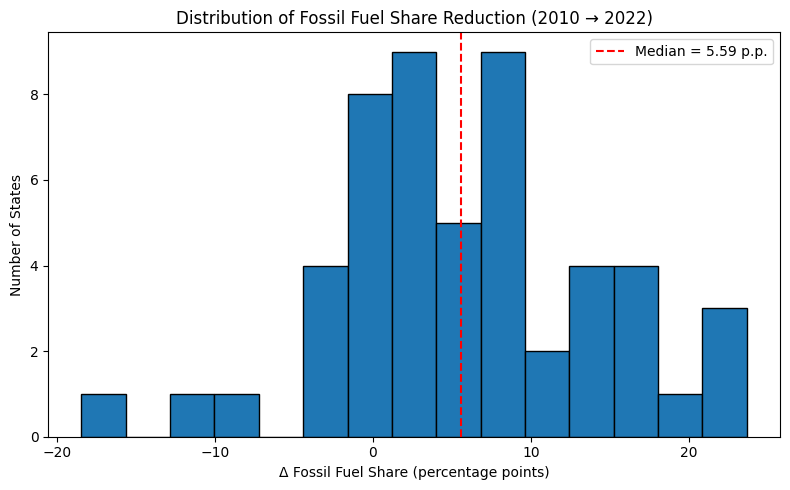


Top 5 reducers:
   State  fossil_share_2010  fossil_share_2022  delta_fossil_share
12    IA          83.962421          60.314257           23.648164
41    SD          62.529971          39.956219           22.573752
36    OK          96.532538          74.720827           21.811710
16    KS          77.210286          56.483738           20.726548
32    NM          97.743562          80.060130           17.683432

Bottom 5 reducers (including increases):
   State  fossil_share_2010  fossil_share_2022  delta_fossil_share
13    ID          26.653816          45.102985          -18.449169
6     CT          36.519129          47.556297          -11.037168
19    MA          73.193202          82.427701           -9.234499
25    MS          79.025726          83.173741           -4.148015
31    NJ          43.796783          46.403174           -2.606391


In [ ]:
#Distribution of Fossil Fuel Share Reduction
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.errors import ParserError

# ------------------ CONFIG ------------------
SEDS_WIDE = Path("/use_all_btu.csv")  # <-- change if needed
YEAR_START = 2010
YEAR_END   = 2022
OUT_CSV    = "fossil_reduction_by_state.csv"
OUT_FIG    = "fossil_reduction_hist.png"
BINS       = 15
# --------------------------------------------

def is_year(col):
    try:
        y = int(col)
        return 1900 <= y <= 2100
    except:
        return False

def read_seds(path: Path) -> pd.DataFrame:
    """
    Read SEDS wide CSV robustly. First try the fast default parser.
    If it fails, fall back to skipping bad lines. If that still fails,
    use the python engine.
    """
    try:
        return pd.read_csv(path, low_memory=False)
    except ParserError as e1:
        print("ParserError with default engine. Retrying with on_bad_lines='skip'...")
        try:
            return pd.read_csv(path, low_memory=False, on_bad_lines="skip")
        except Exception as e2:
            print("Still failed. Retrying with engine='python' ...")
            return pd.read_csv(path, low_memory=False, engine="python")

def main():
    # 1) Load SEDS robustly
    df = read_seds(SEDS_WIDE)

    # 2) Reshape to long
    year_cols = [c for c in df.columns if is_year(c)]
    long = df.melt(
        id_vars=["State", "MSN"],
        value_vars=year_cols,
        var_name="Year",
        value_name="Data"
    ).dropna()
    long["Year"] = long["Year"].astype(int)

    # 3) Filter to the correct SEDS series:
    #    - MSN ends with 'B'
    #    - Third character == 'E' (energy consumption bucket)
    long = long[long["MSN"].str.len() >= 5]
    long = long[long["MSN"].str.endswith("B")]
    long = long[long["MSN"].str[2] == "E"]

    # Fossil fuels: coal (CL), natural gas (NG), petroleum (PE)
    fossil_prefixes = {"CL", "NG", "PE"}
    fossil = (
        long[long["MSN"].str[:2].isin(fossil_prefixes)]
        .groupby(["State", "Year"], as_index=False)["Data"]
        .sum()
        .rename(columns={"Data": "fossil_btu"})
    )

    # Total energy consumption: TE
    total = (
        long[long["MSN"].str[:2].eq("TE")]
        .groupby(["State", "Year"], as_index=False)["Data"]
        .sum()
        .rename(columns={"Data": "total_btu"})
    )

    merged = total.merge(fossil, on=["State", "Year"], how="left")
    merged["fossil_share"] = (merged["fossil_btu"] / merged["total_btu"]) * 100

    # 4) Select the two years and compute delta
    wide = (
        merged[merged["Year"].isin([YEAR_START, YEAR_END])]
        .pivot(index="State", columns="Year", values="fossil_share")
    )

    # Ensure both columns exist
    col_start = f"fossil_share_{YEAR_START}"
    col_end   = f"fossil_share_{YEAR_END}"
    wide.columns = [f"fossil_share_{c}" for c in wide.columns]
    for c in [col_start, col_end]:
        if c not in wide.columns:
            wide[c] = np.nan

    wide["delta_fossil_share"] = wide[col_start] - wide[col_end]
    wide = wide.reset_index()

    # 5) Save tidy data
    wide.to_csv(OUT_CSV, index=False)
    print(f"Saved per-state reductions to {OUT_CSV}")

    # 6) Plot histogram
    vals = wide["delta_fossil_share"].dropna().values

    plt.figure(figsize=(8, 5))
    plt.hist(vals, bins=BINS, edgecolor="black")
    plt.axvline(np.median(vals), color="red", linestyle="--", linewidth=1.5,
                label=f"Median = {np.median(vals):.2f} p.p.")
    plt.title(f"Distribution of Fossil Fuel Share Reduction ({YEAR_START} → {YEAR_END})")
    plt.xlabel("Δ Fossil Fuel Share (percentage points)")
    plt.ylabel("Number of States")
    plt.legend()
    plt.tight_layout()
    plt.savefig(OUT_FIG, dpi=300)
    plt.show()

    # 7) Quick ranks
    print("\nTop 5 reducers:")
    print(wide.sort_values("delta_fossil_share", ascending=False).head(5)[
        ["State", col_start, col_end, "delta_fossil_share"]
    ])
    print("\nBottom 5 reducers (including increases):")
    print(wide.sort_values("delta_fossil_share", ascending=True).head(5)[
        ["State", col_start, col_end, "delta_fossil_share"]
    ])

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd

# Load the file
df = pd.read_csv('/use_all_btu.csv')

# Print out the first few rows and column names
print(df.columns)
print(df.head())

Index(['Data_Status', 'State', 'MSN', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')
  Data_Status State    MSN    1960    1961    1962    1963    1964    1965  \
0       2023F    AK  ABICB     0.0     0.0     0.0     0.0     0.0     0.0   
1       2023F    AK  ARICB   312.0   555.0   489.0   589.0   791.0   878.0   
2       2023F    AK  ARTCB   312.0   555.0   489.0   589.0   791.0   878.0   
3       2023F    AK  ARTXB   312.0   555.0   489.0   589.0   791.0

<Figure size 1200x600 with 0 Axes>

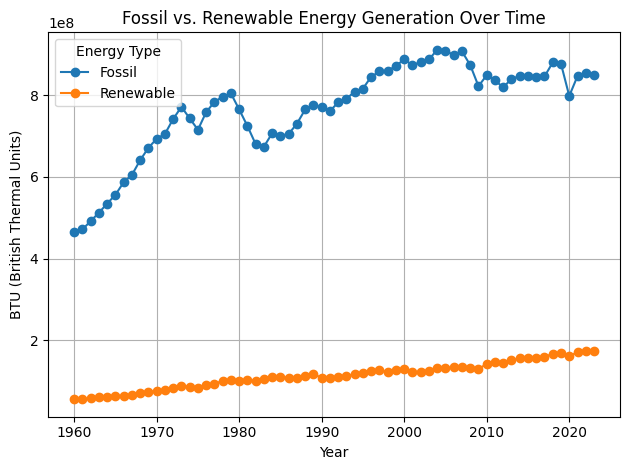

In [ ]:
#Fossil vs Renewable Energy Generation over time
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv("/use_all_btu.csv")
codes_df = pd.read_csv("/Codes_and_Descriptions.csv")

# Clean and rename columns
codes_df.columns = ['Index', 'MSN', 'Description', 'Category']
merged_df = df.merge(codes_df[['MSN', 'Description']], on='MSN', how='left')

# Classify energy source
def classify_energy(description):
    desc = str(description).lower()
    if any(k in desc for k in ['coal', 'natural gas', 'petroleum', 'fossil']):
        return 'Fossil'
    elif any(k in desc for k in ['wind', 'solar', 'geothermal', 'hydro', 'wood', 'biomass', 'renewable']):
        return 'Renewable'
    else:
        return 'Other'

merged_df['Energy_Type'] = merged_df['Description'].apply(classify_energy)

# Reshape and clean data
melted_df = merged_df.melt(id_vars=['State', 'MSN', 'Energy_Type'],
                           value_vars=[str(y) for y in range(1960, 2024)],
                           var_name='Year', value_name='BTU')
melted_df['BTU'] = pd.to_numeric(melted_df['BTU'], errors='coerce')
melted_df = melted_df.dropna(subset=['BTU'])

# Aggregate and pivot
agg_df = melted_df.groupby(['Year', 'Energy_Type'])['BTU'].sum().reset_index()
pivot_df = agg_df.pivot(index='Year', columns='Energy_Type', values='BTU')

# Plot
plt.figure(figsize=(12, 6))
pivot_df[['Fossil', 'Renewable']].plot(kind='line', marker='o')
plt.title('Fossil vs. Renewable Energy Generation Over Time')
plt.ylabel('BTU (British Thermal Units)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Energy Type')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/use_all_btu.csv")
print(df.columns)

Index(['Data_Status', 'State', 'MSN', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [ ]:
import pandas as pd

energy_df = pd.read_csv("/use_all_btu.csv")
print(energy_df.columns.tolist())

['Data_Status', 'State', 'MSN', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [ ]:


import pandas as pd

pres_df = pd.read_csv('/1976-2020-president.csv')
print(pres_df.columns)

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')


/tmp/ipython-input-25-1358949462.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_party_df['party_simplified_grouped'] = winning_party_df['party_simplified'].apply(simplify_party)


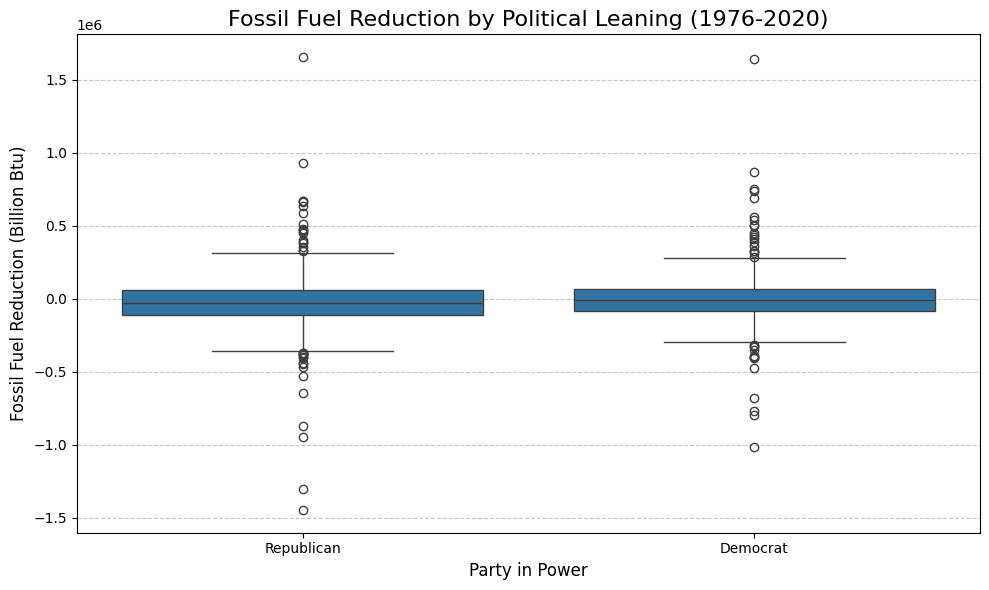

In [ ]:
# Fossil Fuel Reduction by Political Leaning
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_df is already prepared as in the previous steps
# If not, you would need to run the data loading, processing, and merging steps first.
# For context, here's how `merged_df` was created in the previous steps:

# # Load the datasets (if not already loaded)
energy_df = pd.read_csv('/use_all_btu.csv')
election_df = pd.read_csv('/1976-2020-president.csv')

# # Define fossil fuel MSNs based on the search results
fossil_fuel_msn_prefixes = ['CL', 'AR', 'AV', 'DF', 'FG', 'JB', 'KF', 'LG', 'LS', 'MG', 'PC', 'RB', 'RF', 'TL', 'TS', 'WT', 'NG']

# # Filter energy_df for fossil fuels
fossil_energy_df = energy_df[energy_df['MSN'].str[:2].isin(fossil_fuel_msn_prefixes)]

# # Melt the DataFrame to transform year columns into rows
years = [str(year) for year in range(1960, 2024)]
fossil_energy_melted = fossil_energy_df.melt(id_vars=['State', 'MSN'], value_vars=years, var_name='year', value_name='consumption')

# # Convert 'year' to integer type
fossil_energy_melted['year'] = fossil_energy_melted['year'].astype(int)

# # Group by State and year and sum consumption
yearly_fossil_consumption = fossil_energy_melted.groupby(['State', 'year'])['consumption'].sum().reset_index()

# # Sort data for proper year-over-year calculation
yearly_fossil_consumption = yearly_fossil_consumption.sort_values(by=['State', 'year'])

# # Calculate year-over-year reduction
yearly_fossil_consumption['consumption_lag'] = yearly_fossil_consumption.groupby('State')['consumption'].shift(1)
yearly_fossil_consumption['fossil_fuel_reduction'] = yearly_fossil_consumption['consumption_lag'] - yearly_fossil_consumption['consumption']

# # Process political data
# # Filter for 'US PRESIDENT' office
election_presidential = election_df[election_df['office'] == 'US PRESIDENT'].copy()

# # Find the winning party for each state (using state_po) and year
election_presidential = election_presidential.sort_values(by=['year', 'state_po', 'candidatevotes'], ascending=[True, True, False])
winning_party_df = election_presidential.drop_duplicates(subset=['year', 'state_po'], keep='first')

# # Simplify party names
def simplify_party(party):
     if party == 'DEMOCRAT':
         return 'Democrat'
     elif party == 'REPUBLICAN':
         return 'Republican'
     else:
         return 'Other'

winning_party_df['party_simplified_grouped'] = winning_party_df['party_simplified'].apply(simplify_party)

# # Select relevant columns and rename state_po to State
winning_party_df = winning_party_df[['year', 'state_po', 'party_simplified_grouped']].copy()
winning_party_df.rename(columns={'state_po': 'State'}, inplace=True)

# # Define a common range of years for merging
min_year = max(yearly_fossil_consumption['year'].min(), winning_party_df['year'].min())
max_year = min(yearly_fossil_consumption['year'].max(), winning_party_df['year'].max())

# # Filter dataframes to the common year range
yearly_fossil_consumption_filtered = yearly_fossil_consumption[(yearly_fossil_consumption['year'] >= min_year) & (yearly_fossil_consumption['year'] <= max_year)]
winning_party_df_filtered = winning_party_df[(winning_party_df['year'] >= min_year) & (winning_party_df['year'] <= max_year)]

# # Merge the two dataframes
merged_df = pd.merge(yearly_fossil_consumption_filtered, winning_party_df_filtered, on=['State', 'year'], how='inner')

# # Drop rows with NaN in 'fossil_fuel_reduction' column (first year will have NaN)
merged_df.dropna(subset=['fossil_fuel_reduction'], inplace=True)


# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='party_simplified_grouped', y='fossil_fuel_reduction', data=merged_df)

# Add title and labels
plt.title('Fossil Fuel Reduction by Political Leaning (1976-2020)', fontsize=16)
plt.xlabel('Party in Power', fontsize=12)
plt.ylabel('Fossil Fuel Reduction (Billion Btu)', fontsize=12)

# Improve layout and save the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('fossil_fuel_reduction_boxplot.png')

plt.show()

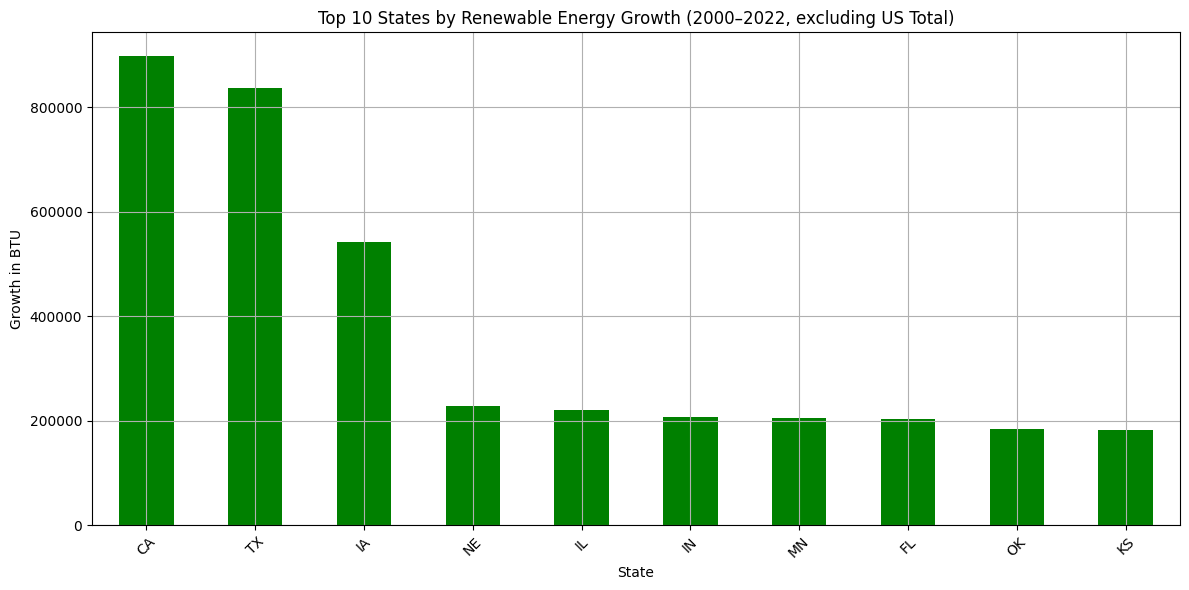

In [1]:
# Top 10 States by Renewable Energy Growth
import pandas as pd
import matplotlib.pyplot as plt

# Load the energy dataset
energy_df = pd.read_csv("/use_all_btu.csv")

# Define top-level renewable MSN codes (total renewable, residential, commercial, etc.)
renewable_codes = ["RETCB", "REPRB", "RECCB", "REICB", "RETCV", "REACB"]

# Filter to rows that match renewable codes and exclude US total
renewable_df = energy_df[
    energy_df["MSN"].isin(renewable_codes) & (energy_df["State"] != "US")
].copy()

# Use 2000 and 2022 as the range for comparison
renewable_df["Start"] = renewable_df["2000"]
renewable_df["End"] = renewable_df["2022"]

# Drop rows with missing or zero data
renewable_df = renewable_df.dropna(subset=["Start", "End"])
renewable_df = renewable_df[(renewable_df["Start"] > 0) | (renewable_df["End"] > 0)]

# Aggregate renewable energy totals by state
state_growth = renewable_df.groupby("State")[["Start", "End"]].sum()
state_growth["Growth"] = state_growth["End"] - state_growth["Start"]

# Get top 10 states by growth
top_states = state_growth.sort_values(by="Growth", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_states["Growth"].plot(kind="bar", color="green")
plt.title("Top 10 States by Renewable Energy Growth (2000–2022, excluding US Total)")
plt.ylabel("Growth in BTU")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
